In [3]:
import importlib
import sys
import os
import glob
import time
import cv2
#import h5py
import traceback

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
import matplotlib.gridspec as gridspec

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import auxiliary as aux
import plotting as putil

In [6]:
putil.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook
rootdir = util.get_rootdir()
# rootdir

In [7]:
rootdir = '/Volumes/Julie/2p-data'
#rootdir = '/mnt/minerva/2p-data'
# -------------------------------------------------
date = 20230822 #20230725 #20230822 #20230822
flynum = 3
# -------------------------------------------------
# get directories
flyid = 'fly{}'.format(flynum)
session = str(date)
sessdir = os.path.join(rootdir, session)
print(sessdir)
behavior_dir = os.path.join(sessdir, 'behavior')
logdir = os.path.join(sessdir, 'behavior') #'logfiles')
videodir = os.path.join(sessdir, 'behavior') #'videos')
neural_dir = os.path.join(sessdir, 'raw')
# face cam data -----------------------------------
# NOTE: .mp4 is compressed, prob easier to work with
# NOTE2: sometimes, >1 video...
all_vid_fpaths = sorted(glob.glob(os.path.join(sessdir, 
                                'behavior', '{}*{}'.format(session, flyid))), key=util.natsort)
# behavior data -----------------------------------
logfiles = aux.get_logs_for_fly_date(date, flynum, logdir)

# DESTDIR -------------------------------------------
figid = '{}-{}'.format(session, flyid)
print(figid)

destdir = os.path.join(rootdir, session, 'processed')
if not os.path.exists(destdir):
    os.makedirs(destdir)
figdir = os.path.join(destdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Volumes/Julie/2p-data/20230822
20230822-fly3


In [8]:
xvar = 'ft_posx'
yvar = 'ft_posy'
default_cond = 'tap'
df0 = aux.logfiles_to_dataframe(logfiles, flyid)
df0 = aux.merge_blocks(df0, fps=120)

/Volumes/Julie/2p-data/20230822/behavior/20230822-153812_P1_activation_fly3_000.log
/Volumes/Julie/2p-data/20230822/behavior/20230822-160657_P1_activation_fly3_001.log
/Volumes/Julie/2p-data/20230822/behavior/20230822-162257_P1_activation_fly3_002.log
/Volumes/Julie/2p-data/20230822/behavior/20230822-162500_P1_activation_fly3_003.log
*Warning: N zero points (2) don't match skips (36) -- using N zero points.
/Volumes/Julie/2p-data/20230822/behavior/20230822-163923_P1_activation_fly3_004.log


<IPython.core.display.Javascript object>


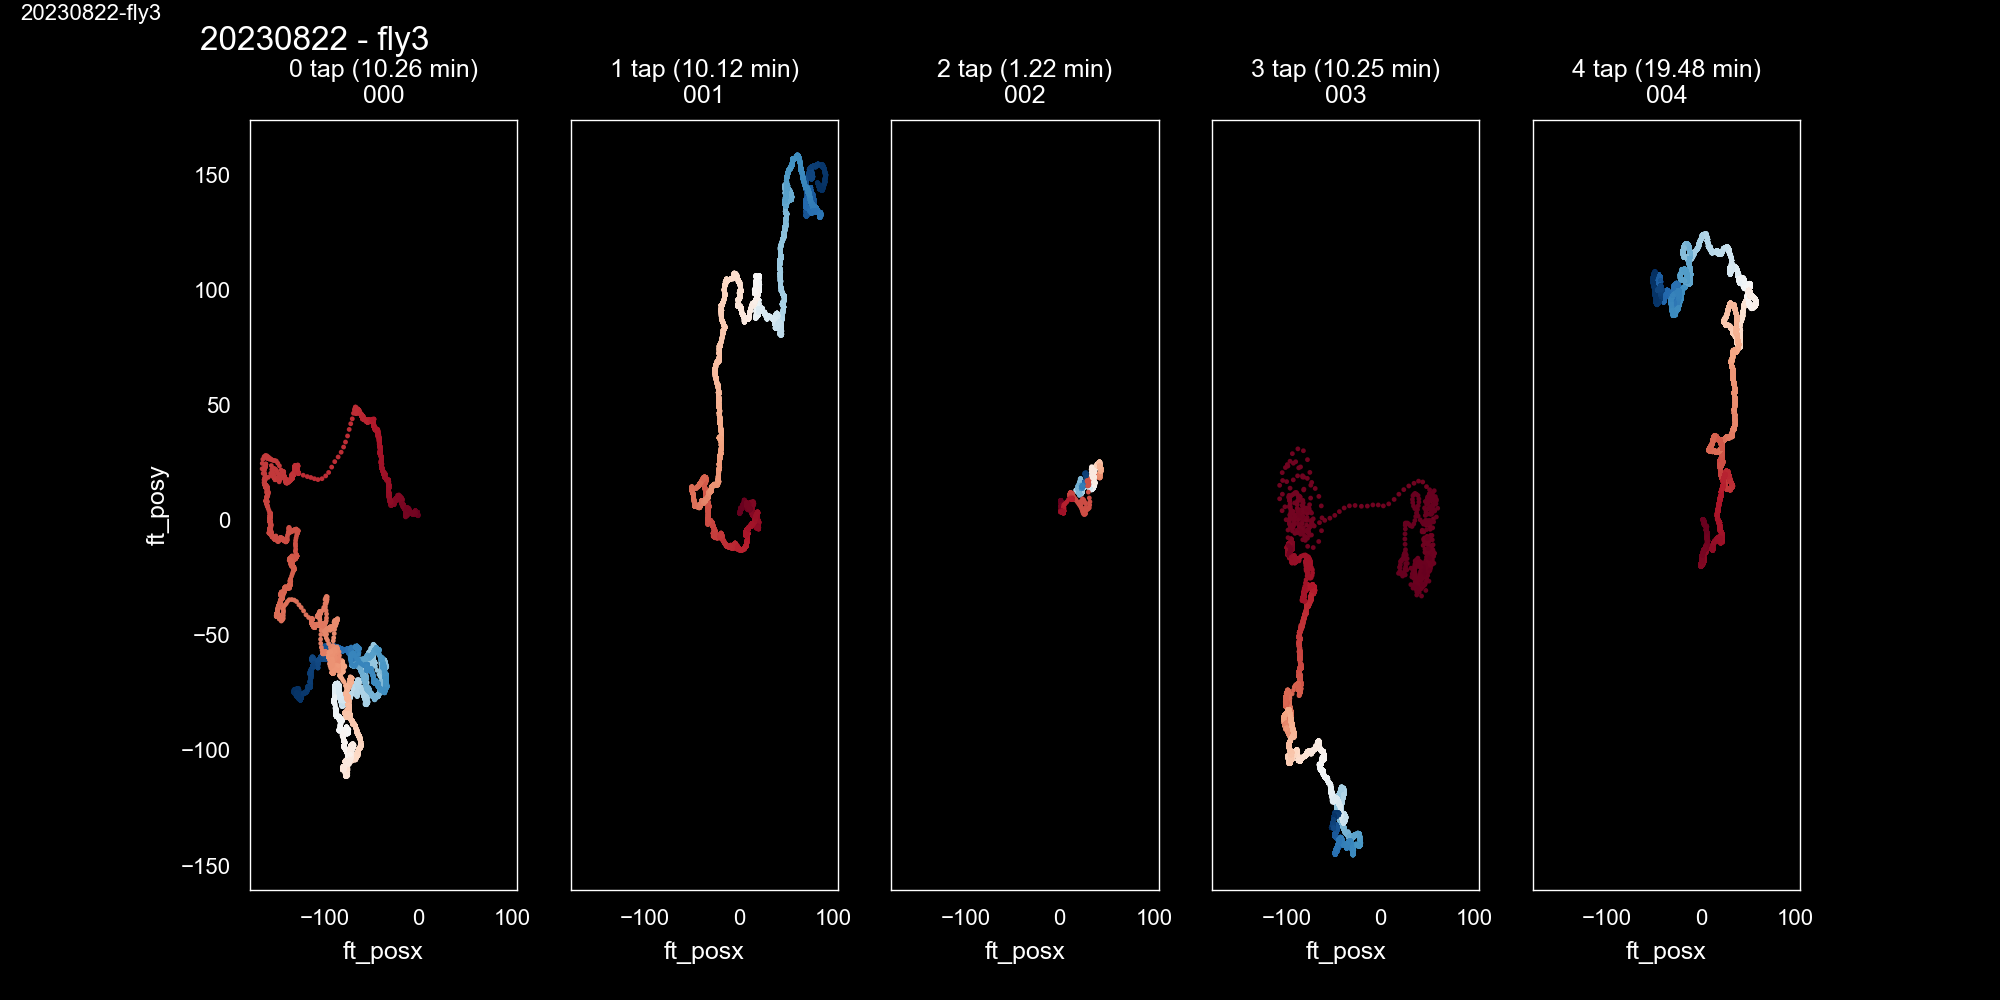

20230822-163923_P1_activation_fly3_004
tracking_merged-bouts_by-time


In [9]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = df0['filename'].dropna().nunique()
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(df0.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    ax=axn[fi]
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1]))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

util.label_figure(fig, figid)
figname = 'tracking_merged-bouts_by-time'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

In [10]:
filenames = sorted(df0['filename'].dropna().unique(), key=util.natsort)
for fi, fn in enumerate(filenames):
    print(fi, fn)

0 20230822-153812_P1_activation_fly3_000
1 20230822-160657_P1_activation_fly3_001
2 20230822-162257_P1_activation_fly3_002
3 20230822-162500_P1_activation_fly3_003
4 20230822-163923_P1_activation_fly3_004


# Select 1 file

In [11]:
logfn = filenames[1]
print(logfn)
df = df0[df0['filename']==logfn].copy()
cfg = butil.load_experiment_config(os.path.join(logdir, logfn))
print(cfg)
print(logfn)

20230822-160657_P1_activation_fly3_001
{'name': 'P1_activation', 'datestr': '20230822-160657_P1_activation_fly3_001', 'experiment': {'pre_air_time': 0, 'max_total_airflow': 0, 'strip_width': 10000, 'strip_spacing': 0, 'percent_odor': 0, 'source_distance': 10000, 'reinforce': True, 'y_thresh': 500, 'pre_led_time': 15, 'led_intensity': 100, 'led_color': 'red', 'window_len': 5, 'pulse_period': 1, 'acquisition_rate': 60}, 'camera': {'experimenter': 'jyr', 'savedir': '/home/julianarhee/Videos/basler-tests', 'codec': 'libx264', 'basler_options': {'Width': 960, 'Height': 600, 'Framerate': 120.0, 'Exposure': 8000.0, 'Gain': 1, 'Uncompressed': False}, 'cams': {'fictrac': {'type': 'Basler', 'master': False, 'serial': 22297042, 'options': {'AcquisitionMode': 'Continuous', 'ExposureAuto': 'Off', 'ExposureMode': 'Timed', 'ExposureTime': 1000.0, 'BinningVerticalMode': 'Sum', 'BinningHorizontalMode': 'Sum', 'BinningVertical': 2, 'BinningHorizontal': 2, 'Height': 600, 'Width': 960, 'CenterX': True, 'C

## Get corresponding CAM data

In [12]:
logfn

'20230822-160657_P1_activation_fly3_001'

In [15]:
# frame rate of FT
fps_behav= cfg['experiment']['acquisition_rate']
# frame rate of SIDECAM
camdir0 = aux.get_videodir_from_tstamp(logfn, all_vid_fpaths)
cfg_cam0 = aux.load_cam_config(camdir0)
cam0 = 'flyleft'
fps_cam0 = cfg_cam0['cams'][cam0]['options']['AcquisitionFrameRate']
# path to SIDECAM vid
cam0_fpaths = glob.glob(os.path.join(camdir0, '*.avi'))
cam0_fpath = cam0_fpaths[0]
print(cam0_fpath)

/Volumes/Julie/2p-data/20230822/behavior/20230822-160623_fly3/flyleft_20230822160623_00000.avi


<IPython.core.display.Javascript object>


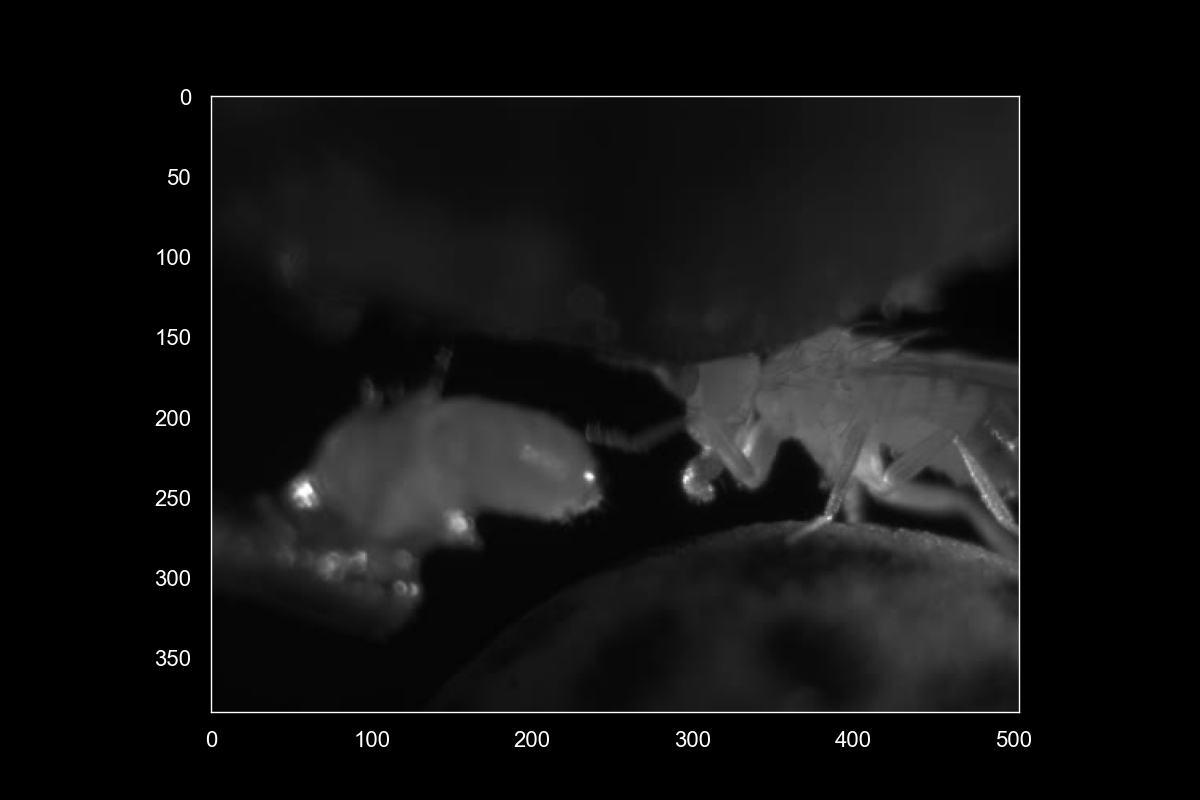

In [41]:
# FACECAM video
start_frame=61
vcap = cv2.VideoCapture(cam0_fpath)
vcap.set(1, start_frame)
ret, frame = vcap.read()

fig, ax = pl.subplots()
ax.imshow(frame)

## Load manual taps

In [152]:
cam0_fpath

'/Volumes/Julie/2p-data/20230822/behavior/20230822-160623_fly3/flyleft_20230822160623_00000.avi'

In [153]:
import re

In [154]:
cam0_fname = os.path.splitext(os.path.split(cam0_fpath)[-1])[0]
print(cam0_fname)
manual_taps_fp = glob.glob(os.path.join(sessdir, 'processed', 'taps_{}.md'.format(cam0_fname)))[0]
print(manual_taps_fp)
lines= []
with open(manual_taps_fp) as f:
    for line in f:
        if line.startswith('#') or line=='':
            pass
        else:
            lines.append(line.strip('\n').strip())

flyleft_20230822160623_00000
/Volumes/Julie/2p-data/20230822/processed/taps_flyleft_20230822160623_00000.md


In [687]:
taps = pd.DataFrame(data=lines, columns=['string'])
taps['certain'] = [0 if '?' in l else 1 for l in taps['string']]
taps['foreleg'] = [re.search(r'\((.*?)\)', l).group(1) if re.search(r'\((.*?)\)', l) is not None else np.nan for l in taps['string']]
taps['frame_str'] = [l.split('(')[0].strip() for l in taps['string']]
taps['start_frame'] = np.array([int(l.split('-')[0].strip()) if '?' not in l else int(l.strip().split('-')[-1][0:-1]) for l in taps['frame_str']]) - 1
taps['end_frame'] = np.array([int(l.split('-')[-1].strip()) if '?' not in l else int(l.strip().split('-')[-1][0:-1]) for l in taps['frame_str']]) - 1
taps['taplevel'] = 0 #None# np.nan
for i, l in taps.iterrows():
    if not isinstance(l['foreleg'], str):
        continue
    if l['certain']==0:
        taps.loc[i, 'taplevel'] = 1
        continue
    else:
        if 'tip' in l['foreleg'] and l['certain']==1:
            taps.loc[i, 'taplevel'] = 2
        elif 'full' in l['foreleg'] and l['certain']==1:
            taps.loc[i, 'taplevel'] = 4
        elif 'half' in l['foreleg'] and l['certain']==1:
            taps.loc[i, 'taplevel'] = 3


In [688]:
taps.loc[9]

string         4779?
certain            0
foreleg          NaN
frame_str      4779?
start_frame     4778
end_frame       4778
taplevel           0
Name: 9, dtype: object

#### plot

<IPython.core.display.Javascript object>


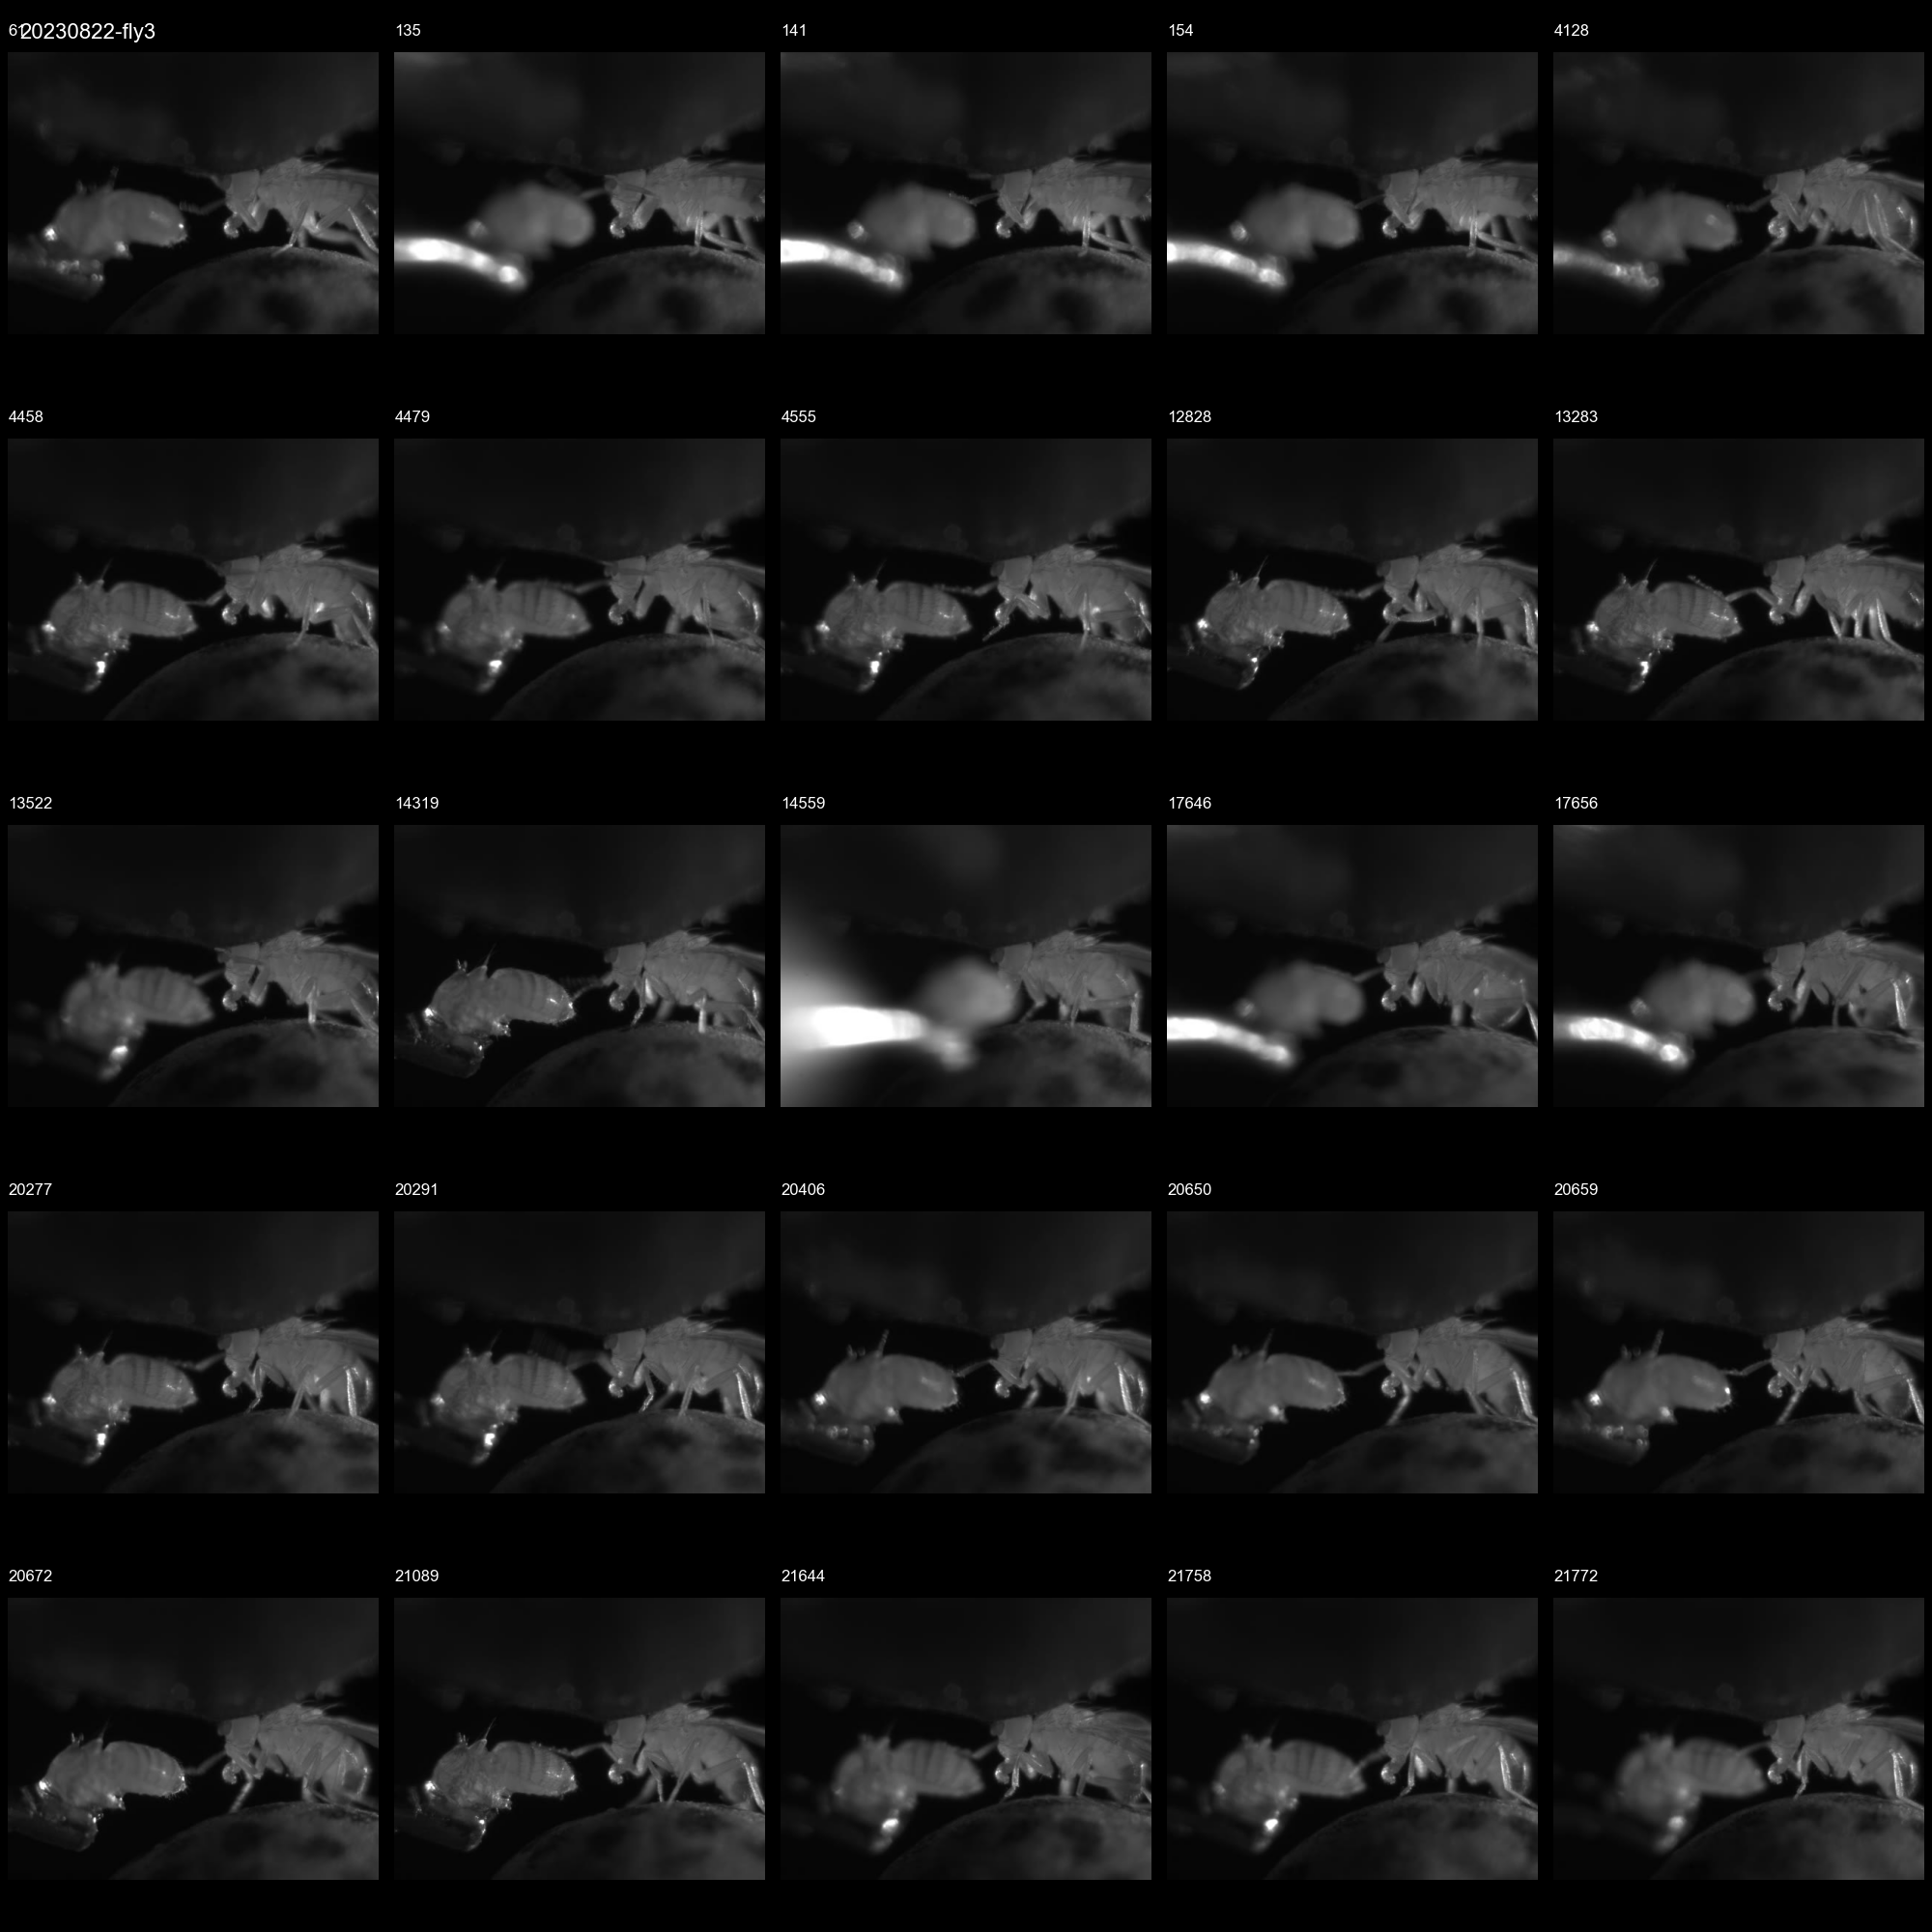

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/1625488705.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for ai, v in enumerate(certaintaps[0:nr*nc]):


In [618]:
certaintaps = taps[taps['certain']==1]['start_frame']
nr, nc = (5,5)
fig, axn = pl.subplots(nr, nc, figsize=(nr*2, nc*2), constrained_layout=True)
for ai, v in enumerate(certaintaps[0:nr*nc]):
    ax=axn.flat[ai]
    vcap.set(1, v)
    ret, frame = vcap.read()
    ax.imshow(frame)
    ax.axis('off')
    ax.set_title(v, loc='left', fontsize=6)
util.label_figure(fig, figid)
figname = 'example-taps_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [641]:
taps['taplevel'].unique()

array([ 2,  4,  1, -1,  3])

<IPython.core.display.Javascript object>


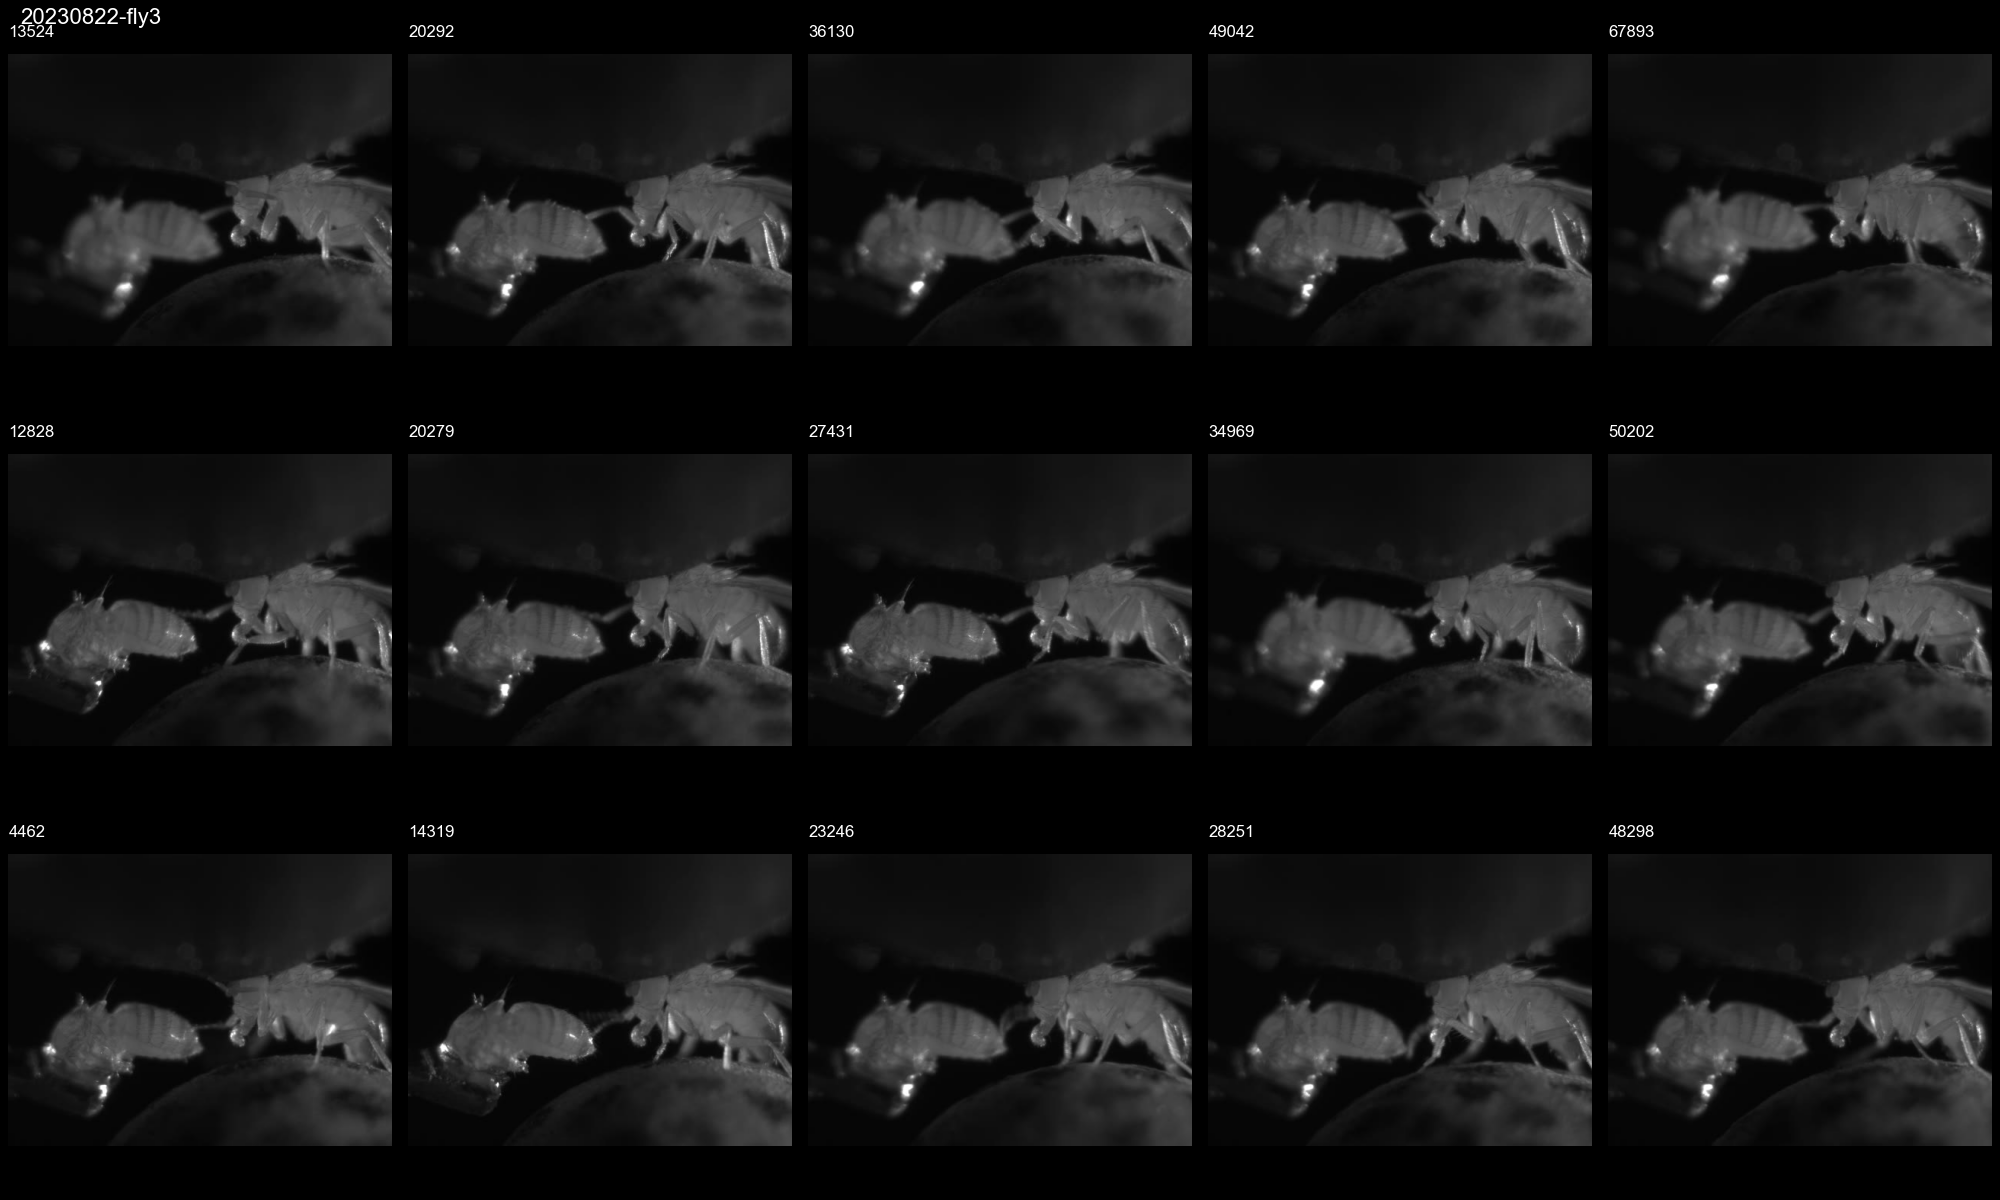

In [620]:
# full_ = taps[taps['taplevel']==4]['start_frame']
# half_ = taps[taps['level']==3]['start_frame']
full_ = np.array([13525, 20293, 36131, 49043, 67894]) - 1
half_ = np.array([12829, 20280, 27432, 34970, 50203]) - 1
tip_ = np.array([4463, 14320, 23247, 28252, 48299]) - 1
nr, nc = (3, 5)
fig, axn = pl.subplots(nr, nc, figsize=(nc*2, nr*2), constrained_layout=True)
for ri, currtaps in enumerate([full_, half_, tip_]):
    #currtaps = taps[taps['taplevel']==tl]['start_frame'].sample(n=6).values
    for ci, ct in enumerate(currtaps):
        ax=axn[ri, ci]
        vcap.set(1, ct)
        ret, frame = vcap.read()
        ax.imshow(frame)
        ax.axis('off')
        ax.set_title(ct, loc='left', fontsize=6)
util.label_figure(fig, figid)
figname = 'example-taps-bylevel_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

# CAM metadata (120 Hz)

In [663]:
cam0_meta_fp = glob.glob(os.path.join(camdir0, '*metadata.h5'))[0]
cam0 = aux.h5_to_df(cam0_meta_fp)
cam0['rel_time'] = cam0['timestamp'] - cam0['timestamp'].iloc[0]
print(cam0.shape)
cam0.head()

(72831, 7)


cputime  framecount  frameid    serial    sestime  timestamp  rel_time
0  1.692735e+09           1        1  24516213  33.640661  33.625133  0.000000
1  1.692735e+09           2        2  24516213  33.655799  33.640307  0.015173
2  1.692735e+09           3        3  24516213  33.674781  33.648642  0.023509
3  1.692735e+09           4        4  24516213  33.682519  33.656977  0.031844
4  1.692735e+09           5        5  24516213  33.690014  33.665313  0.040179

In [664]:
df['rel_time']

0          0.000000
1          0.014089
2          0.030752
3          0.047593
4          0.063781
            ...    
36367    606.975257
36368    606.993042
36369    607.008484
36370    607.025629
36371    607.043368
Name: rel_time, Length: 36372, dtype: float64

# interp to align CAM (120 Hz) and FICTRAC (60 Hz)

<IPython.core.display.Javascript object>


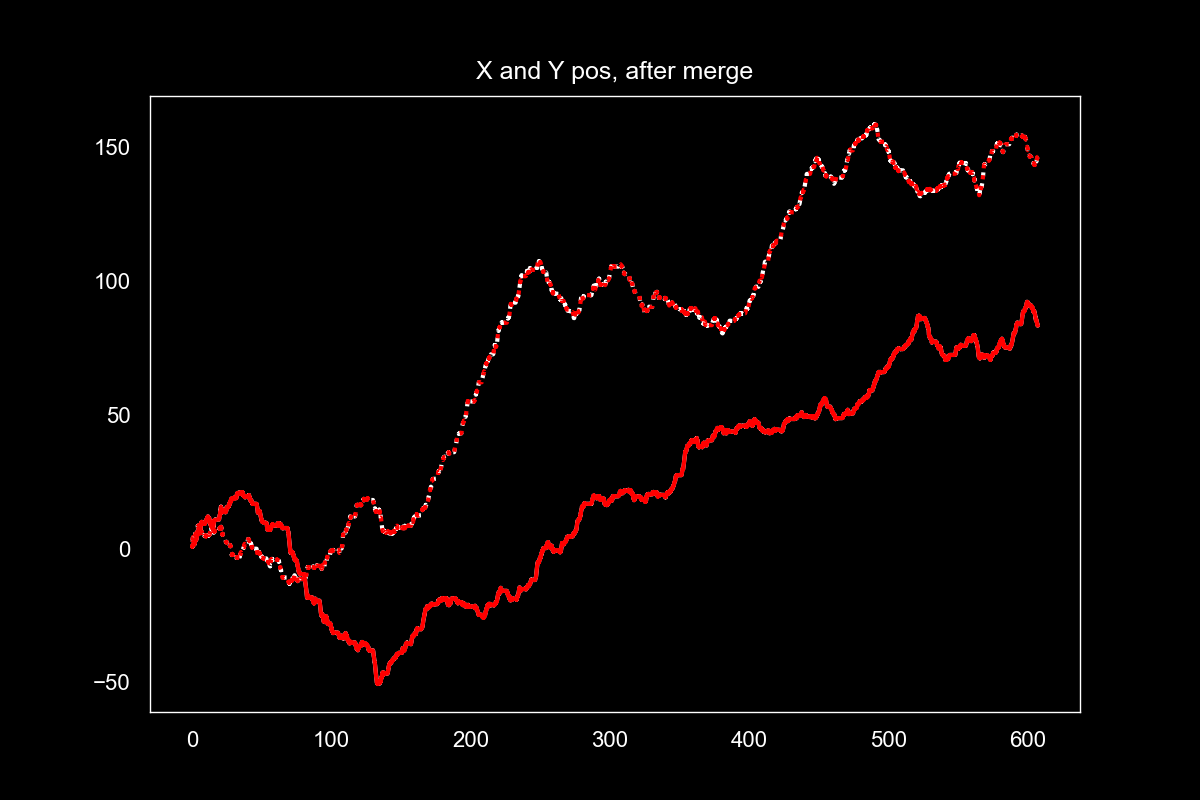

In [665]:
xpos_interp = np.interp(cam0['rel_time'].values, df['rel_time'].values, df['ft_posx'].values)
ypos_interp = np.interp(cam0['rel_time'].values, df['rel_time'].values, df['ft_posy'].values)
tsec_cam = cam0['rel_time'].values

fig, ax = pl.subplots()
ax.plot(df['rel_time'].values, df['ft_posx'].values, 'w')
ax.plot(df['rel_time'].values, df['ft_posy'].values, color='w', linestyle=':')

ax.plot(tsec_cam, xpos_interp, 'r')
ax.plot(tsec_cam, ypos_interp, 'r', linestyle=':')

ax.set_title('X and Y pos, after merge')
pl.subplots_adjust(hspace=0.5)


#### Add interpreted x, y positions 

In [667]:
combined = cam0.copy()
combined['ft_posx'] = xpos_interp
combined['ft_posy'] = ypos_interp

In [668]:
taps.head()

string  certain foreleg frame_str  start_frame  end_frame  taplevel
0        62 (tip)        1     tip        62           61         61         2
1  136-137 (full)        1    full   136-137          135        136         4
2  142-143 (full)        1    full   142-143          141        142         4
3      155 (full)        1    full       155          154        154         4
4     1458? (tip)        0     tip     1458?         1457       1457         1

#### Add tap info

In [696]:
combined['tap'] = 0
for i, (st, t_) in enumerate(taps.groupby('start_frame')):
    et =  t_['end_frame'].values[0]
    fr = np.arange(st, et+1)
    combined.loc[combined['frameid'].isin(fr), 'tap'] = t_['taplevel'].values[0]
    combined.loc[combined['frameid'].isin(fr), 'tapnum'] = i
    combined.loc[combined['frameid'].isin(fr), 'tapstart'] = 0
    combined.loc[combined['frameid']==st, 'tapstart'] = 1

In [698]:
combined['tap'].unique()

array([0, 2, 4, 1, 3])

In [699]:
combined[combined['frameid']==st]

cputime  framecount  frameid    serial    sestime   timestamp  \
72726  1.692735e+09       72727    72727  24516213  639.82349  639.825607   

         rel_time    ft_posx     ft_posy  tap  tapnum  tapstart  
72726  606.200474  85.142918  144.783908    2   184.0       1.0

In [700]:
combined[combined['tap'].isnull()]

Empty DataFrame
Columns: [cputime, framecount, frameid, serial, sestime, timestamp, rel_time, ft_posx, ft_posy, tap, tapnum, tapstart]
Index: []

<IPython.core.display.Javascript object>


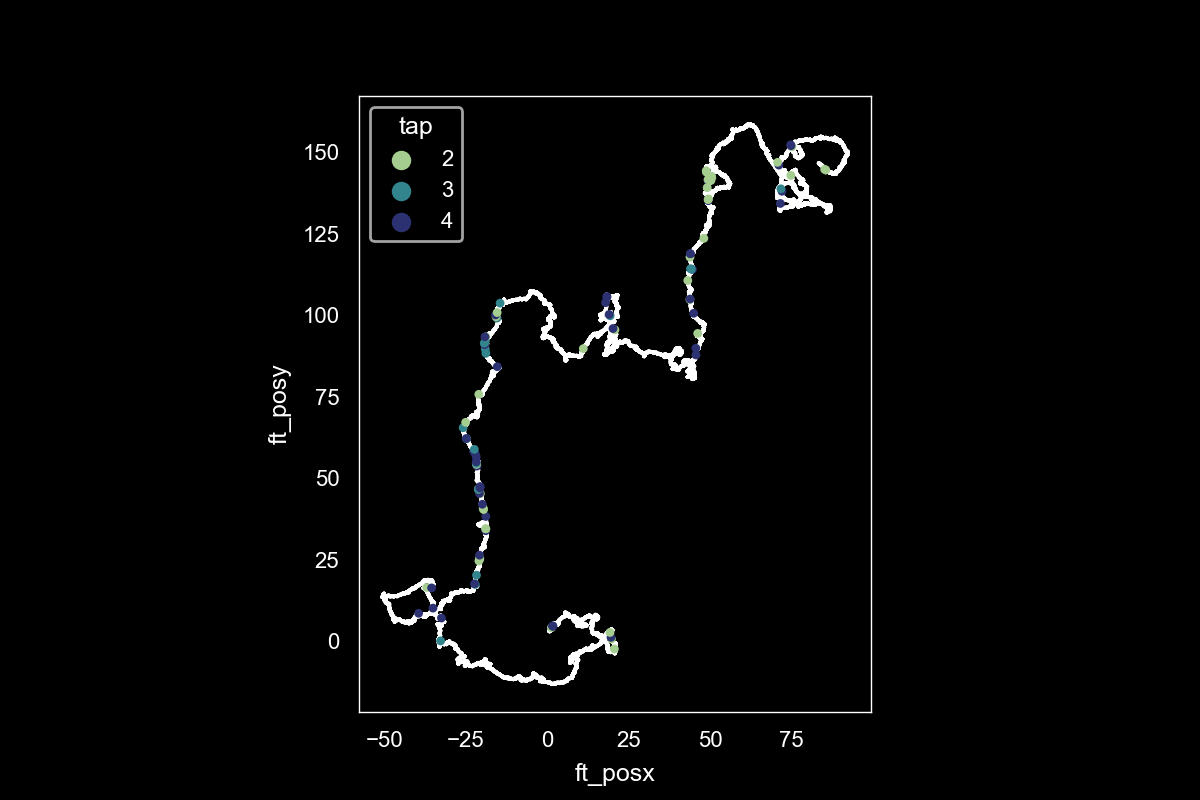

In [703]:
fig, ax = pl.subplots()
sns.scatterplot(data=combined, x='ft_posx', y='ft_posy', ax=ax,
               edgecolor='none', color='w', s=2)
sns.scatterplot(data=combined[(combined['tap']>=2) & (combined['tapstart'])==1], 
                x='ft_posx', y='ft_posy',  ax=ax,
               edgecolor='none', s=10, hue='tap', palette='crest')
ax.set_aspect('equal')

# Load neural traces (10 or 20Hz)

In [178]:
run_index = [i for i, v in enumerate(logfiles) if logfn in v][0]
print(run_index)

1


In [438]:
sessiondir = os.path.join(rootdir, str(session))
all_neural_fpaths = sorted(glob.glob(os.path.join(sessiondir, 
                                'raw', '{}*{}*_Ch2.tif'.format(str(session), flyid))), key=util.natsort)
neural_fpath = all_neural_fpaths[run_index]
print(neural_fpath)
assert os.path.exists(neural_fpath), "2p path does not exist: {}".format(neural_fpath)

tifname = os.path.splitext(os.path.split(neural_fpath)[-1])[0]

/Volumes/Julie/2p-data/20230822/raw/20230822-1535_fly3-001_Ch2.tif


In [475]:
!pip install --prefix {sys.prefix} exifread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.0 MB/s eta 0:00:00


In [546]:
# from PIL import Image
# from PIL.TiffTags import TAGS
# import exifread
from bs4 import BeautifulSoup
#import xml.etree.ElementTree as ET

In [547]:
rawtif_dir = neural_fpath.split('_Ch2.tif')[0]
neuralmeta_fpath = os.path.join(rawtif_dir, '{}.xml'.format(os.path.split(rawtif_dir)[-1]))
assert os.path.exists(neuralmeta_fpath)
with open(neuralmeta_fpath, 'r') as f:
    data = f.read()
meta = BeautifulSoup(data, "xml")
#tree = ET.parse(neuralmeta_fpath)

# with Image.open(img_fpath) as img:
#     meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.iterkeys()}
# f = open(img_fpath, 'rb')
# # Return Exif tags
# tags = exifread.process_file(f)

# # Print the tag/ value pairs
# for tag in tags.keys():
#     if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
#         print("Key: %s, value %s" % (tag, tags[tag]))
# f.close()

In [564]:
# Find all instances of tag "PVStateValue" with </PVStateValue>
b_unique = meta.find_all('Frame')
b_unique

# Using find() to extract attributes 
# of the first instance of the tag
# b_name = meta.find('Frame', 'relativeTime') #'Frank'})
# b_name
neural_tstamps = [float(b['relativeTime']) for b in b_unique]

In [566]:
len(neural_tstamps)

6000

In [575]:
print(tifname)
neuraltraces = aux.load_neural_traces_from_csv(tifname, rootdir=rootdir)
neuraltraces = neuraltraces.reset_index()

20230822-1535_fly3-001_Ch2


In [576]:
# neural_frame_period = 0.0794976

In [577]:
# neuraltraces['time'] = neuraltraces['Slice']/fps_neural
# neuraltraces['time'] = neuraltraces['time']-neuraltraces['time'].iloc[0]
neural_frame_period = 0.1005888 #0.0794976
fps_neural = 1/neural_frame_period
for k, t_ in neuraltraces.groupby('hemi'):
    neuraltraces.loc[t_.index, 'rel_time'] = neural_tstamps
# neuraltraces['time'] = neuraltraces['Slice']/fps_neural
#neuraltraces['time'] = neuraltraces['time']-neuraltraces['time'].iloc[0]


In [579]:
for hemi, df_ in neuraltraces.groupby('hemi'):
    t = df_['Mean'].copy()
    t_sub = util.subtract_rolling_mean(t, 500)
    rollmean = util.subtract_rolling_mean(t, 500, return_mean_only=True)
    neuraltraces.loc[df_.index, 'Mean_detrended'] = t_sub
    neuraltraces.loc[df_.index, 'Mean_basesub'] = df_['Mean'] - rollmean.mean()
    neuraltraces.loc[df_.index, 'Mean_dff'] = (df_['Mean'] - rollmean.mean()) / rollmean.mean()
    
neuraltraces.head()

index  Slice     Mean  hemi  rel_time  Mean_detrended  Mean_basesub  \
0      0      1  90.2715  left  0.000000       -1.232858     -0.641776   
1      1      2  91.8609  left  0.100344        0.351999      0.947624   
2      2      3  89.1656  left  0.200688       -2.353036     -1.747676   
3      3      4  93.6093  left  0.301032        2.086743      2.696024   
4      4      5  95.0397  left  0.401376        3.515024      4.126424   

   Mean_dff  
0 -0.007059  
1  0.010423  
2 -0.019224  
3  0.029655  
4  0.045389

# Combine data

In [708]:
fulldf = combined[combined['rel_time']<=neuraltraces['rel_time'].max()].copy()

In [709]:
for hemi, tr in neuraltraces.groupby('hemi'):
    tr_interp = np.interp(fulldf['rel_time'], tr['rel_time'], tr['Mean_dff'])
    fulldf['neural_{}'.format(hemi)] = tr_interp

<IPython.core.display.Javascript object>


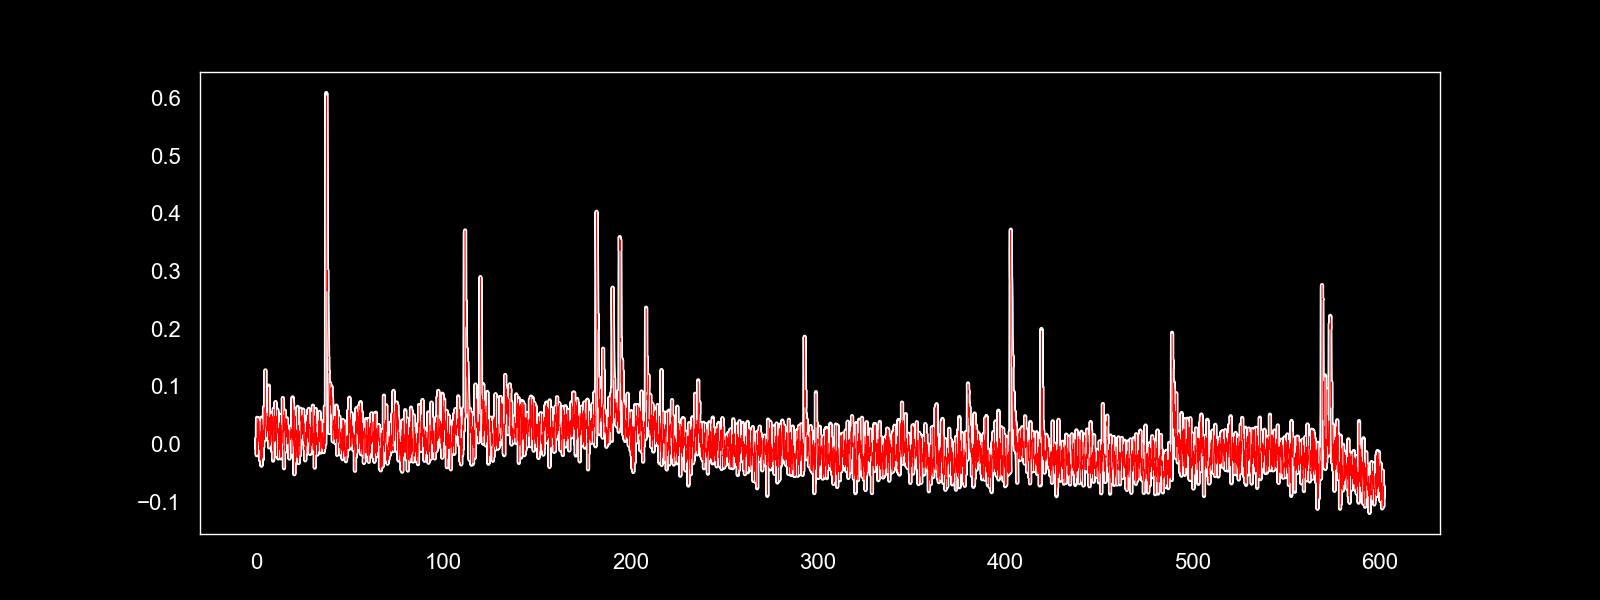

In [710]:
fig, ax = pl.subplots(figsize=(8,3))
ax.plot(neuraltraces[neuraltraces['hemi']=='left']['rel_time'], 
        neuraltraces[neuraltraces['hemi']=='left']['Mean_dff'], 'w')
ax.plot(fulldf['rel_time'], fulldf['neural_left'], 'r', lw=0.2)


In [711]:
importlib.reload(putil)

<module 'plotting' from '/Users/julianarhee/Repositories/plume-tracking/plotting.py'>

In [712]:
fulldf['tap'].unique()

array([0, 2, 4, 1, 3])

<IPython.core.display.Javascript object>


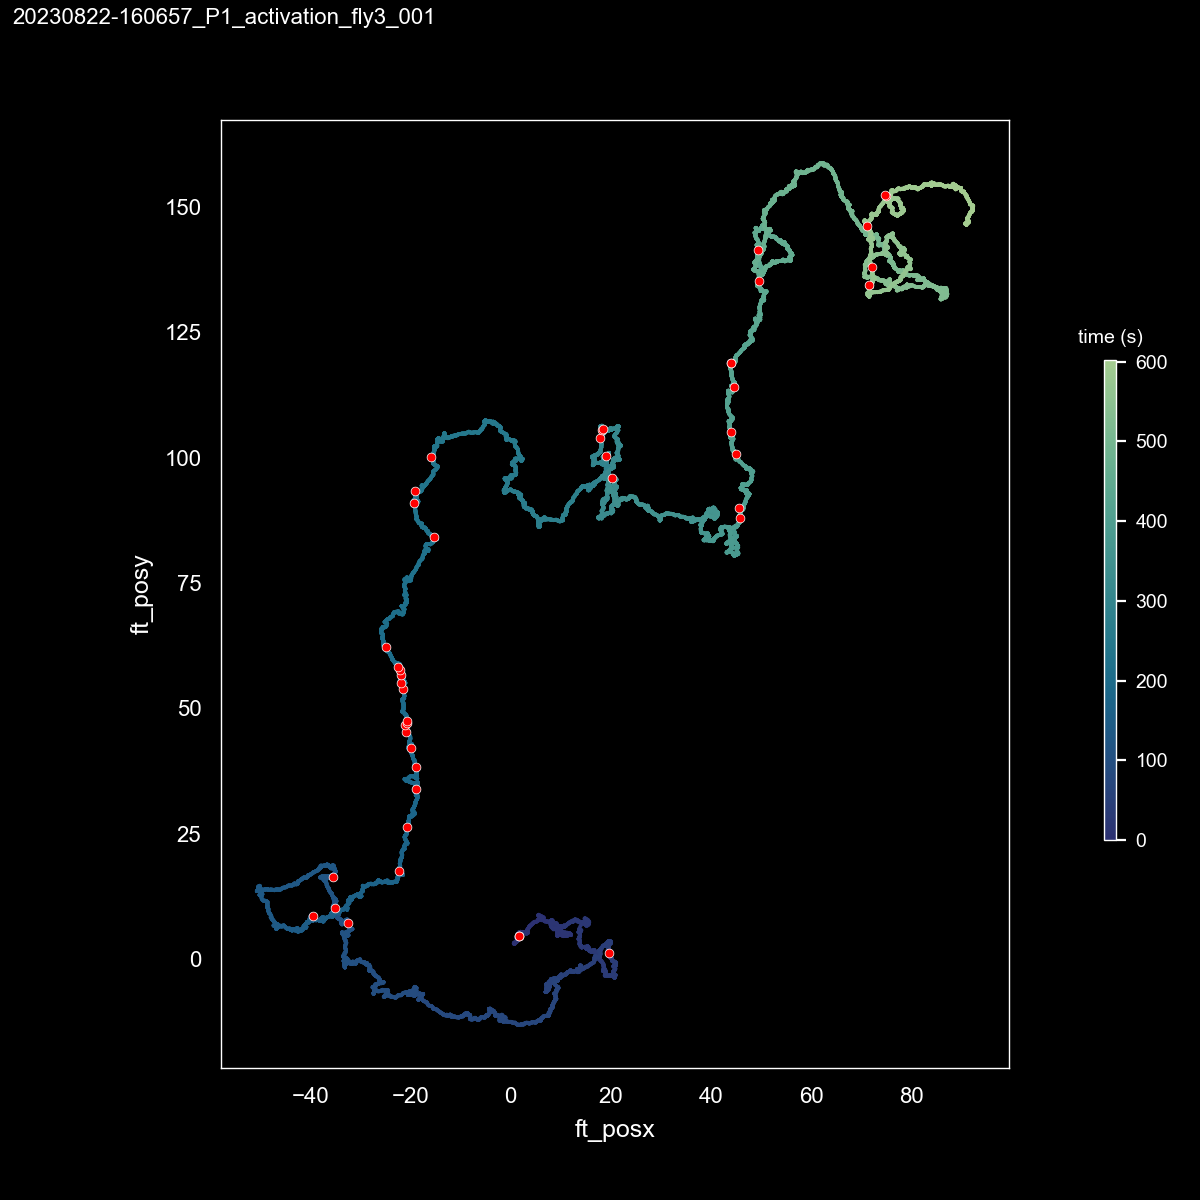

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


In [713]:
# tap_palette='flare'
time_palette='crest_r'

cmap=time_palette
huevar='rel_time'
norm = mpl.colors.Normalize(vmin=fulldf[huevar].min(), vmax=fulldf[huevar].max())
fig, ax = pl.subplots(figsize=(6,6)) #, constrained_layout=False)
# Trajectory
sc = sns.scatterplot(data=fulldf, x='ft_posx', y='ft_posy', ax=ax,
               edgecolor='none', color='w', s=2, hue=huevar, palette=cmap, norm=norm, legend=0)
sns.scatterplot(data=fulldf[(fulldf['tap']==4) & (fulldf['tapstart']==1)], x='ft_posx', y='ft_posy',  ax=ax,
               edgecolor='w', s=10, color='r')
putil.colorbar_from_mappable(ax, norm, cmap=cmap, hue_title='time (s)', 
                             axes=[0.92, 0.3, 0.01, 0.4])
ax.set_aspect('equal')
ax.set_anchor('N')
pl.subplots_adjust(top=0.9)

util.label_figure(fig, logfn)
figname = 'trajectory_with_taps-level4-only_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [714]:
sorted(fulldf['tap'].unique())

[0, 1, 2, 3, 4]

In [715]:
tap_palette=dict((v+1, c) for v, c in zip(np.arange(0, 5), 
                                          sns.color_palette('Spectral',n_colors=5)))
#tap_palette={None: 'black', 1: 'gray', 2: 'indigo', 3: 'darkmagenta', 4: 'magenta'}
#tap_palette={1: [0.2]*3, 2: [0.2]*3, 3: [0.5]*3, 4: [1]*3}
#tap_palette={1: 'black', 2: 'dimgrey', 3: 'darkgray', 4: 'snow'}
cols = ['k', 'gray', 'indigo', 'darkmagenta', 'magenta']
tap_palette = dict((k, v) for k, v in zip(sorted(fulldf['tap'].unique()), cols))


<IPython.core.display.Javascript object>


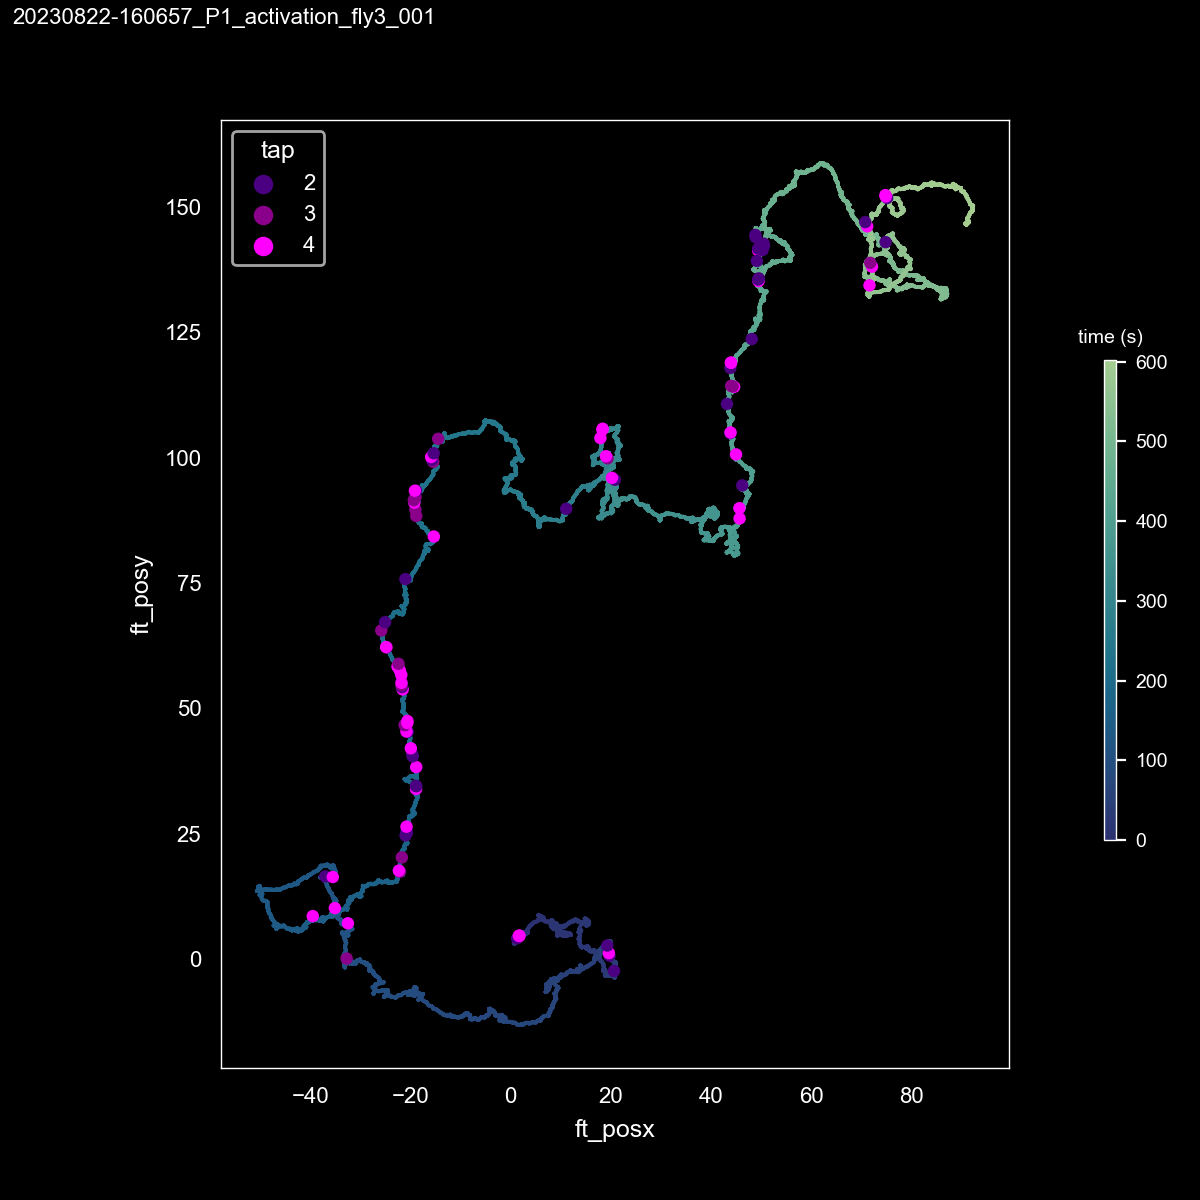

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


In [716]:
#tap_palette='BuPu'
time_palette='crest_r'

cmap=time_palette
huevar='rel_time'
norm = mpl.colors.Normalize(vmin=fulldf[huevar].min(), vmax=fulldf[huevar].max())
fig, ax = pl.subplots(figsize=(6,6)) #, constrained_layout=False)
# Trajectory
sc = sns.scatterplot(data=fulldf, x='ft_posx', y='ft_posy', ax=ax,
               edgecolor='none', color='w', s=2, hue=huevar, palette=cmap, norm=norm, legend=0)
sns.scatterplot(data=fulldf[(fulldf['tap']>=2) & (fulldf['tapstart']==1)], 
                x='ft_posx', y='ft_posy',  ax=ax,
               edgecolor='none', s=20, hue='tap', palette=tap_palette)
putil.colorbar_from_mappable(ax, norm, cmap=cmap, hue_title='time (s)', 
                             axes=[0.92, 0.3, 0.01, 0.4])
ax.set_aspect('equal')
ax.set_anchor('N')
pl.subplots_adjust(top=0.9)

util.label_figure(fig, logfn)
figname = 'trajectory_with_all-taps_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [717]:
sorted(fulldf['tap'].unique())

[0, 1, 2, 3, 4]

<IPython.core.display.Javascript object>


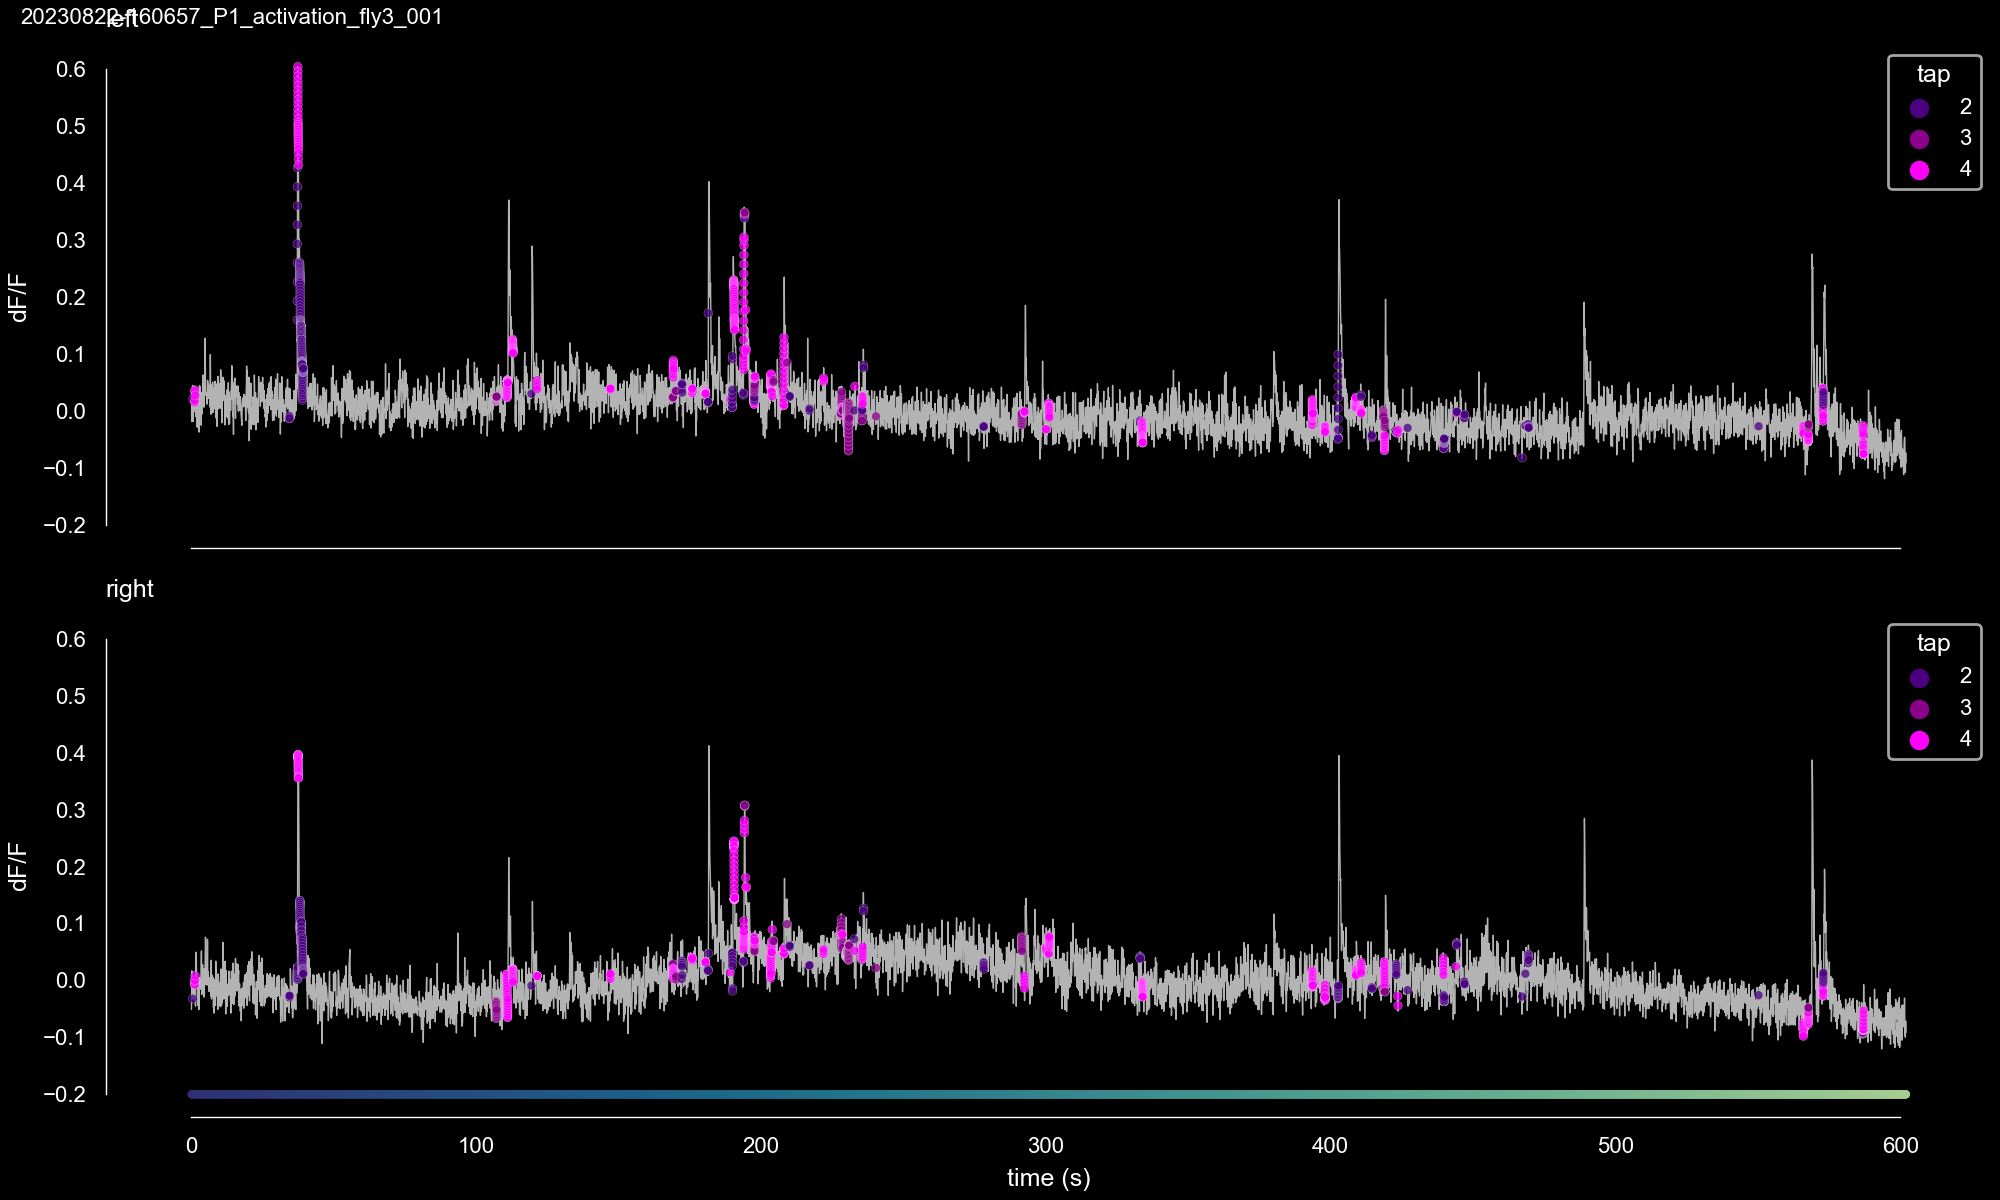

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/2232509265.py:14: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  pl.subplots_adjust(left=0.05, right=0.95, top=0.8)


PermissionError: [Errno 13] Permission denied

In [751]:
# tap_palette='Reds'
# time_palette='crest_r'
fig, axn = pl.subplots(2, 1, figsize=(10,6), sharex=True, sharey=True, constrained_layout=True)
for ai, hemi in enumerate(['left', 'right']):
    ax=axn[ai]
    ax.set_title(hemi, loc='left')
    ax.plot(fulldf['rel_time'], fulldf['neural_{}'.format(hemi)], color=[0.7]*3, lw=0.5)
    #putil.add_colored_lines(fulldf, ax=ax, xvar='rel_time', yvar='neural_{}'.format(hemi), hue_var='rel_time', cmap=cmap, norm=norm)
    sns.scatterplot(data=fulldf[fulldf['tap']>=2], x='rel_time', y='neural_{}'.format(hemi), 
                    hue='tap', palette=tap_palette, ax=ax, zorder=40, 
                    edgecolor='w', linewidth=0.1, s=10, alpha=0.75)
    ax.set_aspect(200)
    ax.set_ylabel('dF/F')
pl.subplots_adjust(left=0.05, right=0.95, top=0.8)
ax.set_xlabel('time (s)')
ax.scatter(x=fulldf['rel_time'], y=[-0.2]*len(fulldf['rel_time']), 
           s=3, c=fulldf['rel_time'], cmap=time_palette)
sns.despine(trim=True)

util.label_figure(fig, logfn)
figname = 'neuraltraces_with_taps_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))


<IPython.core.display.Javascript object>


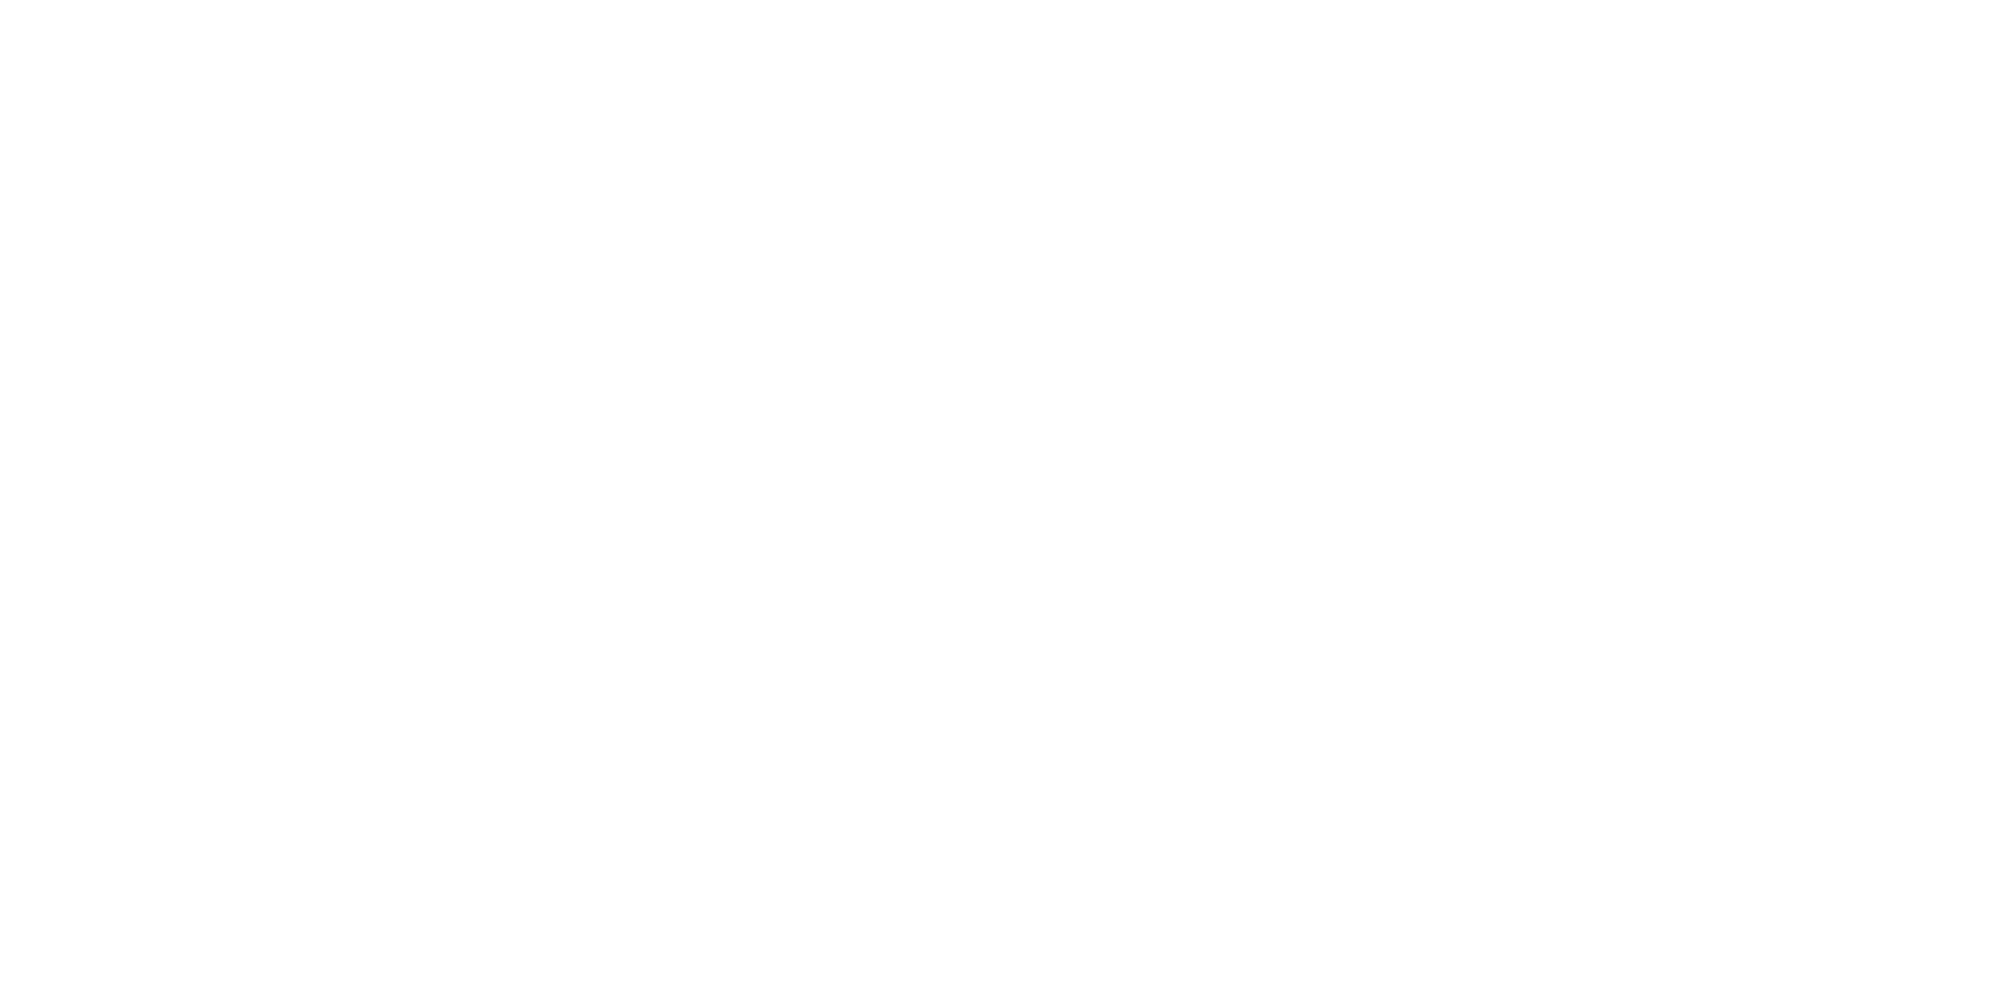

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/139926933.py:27: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  pl.close()


<IPython.core.display.Javascript object>


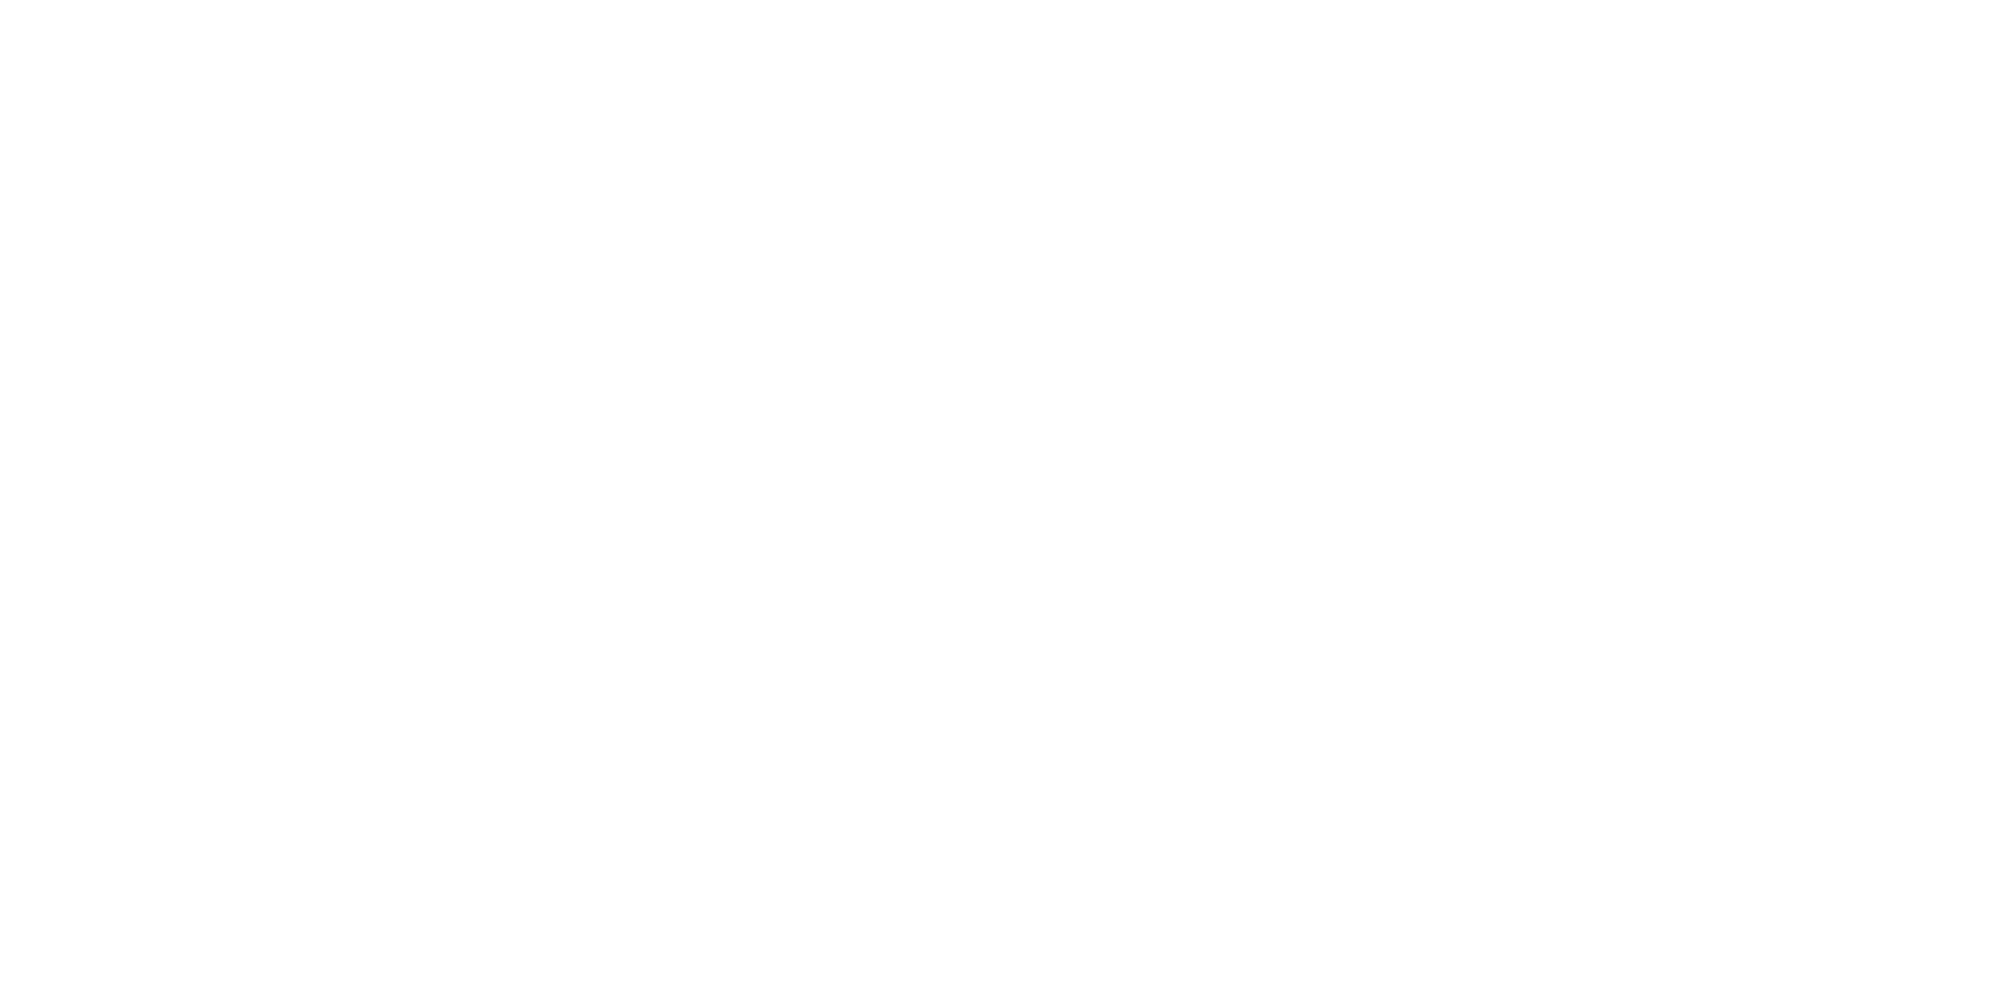

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/139926933.py:27: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  pl.close()


<IPython.core.display.Javascript object>


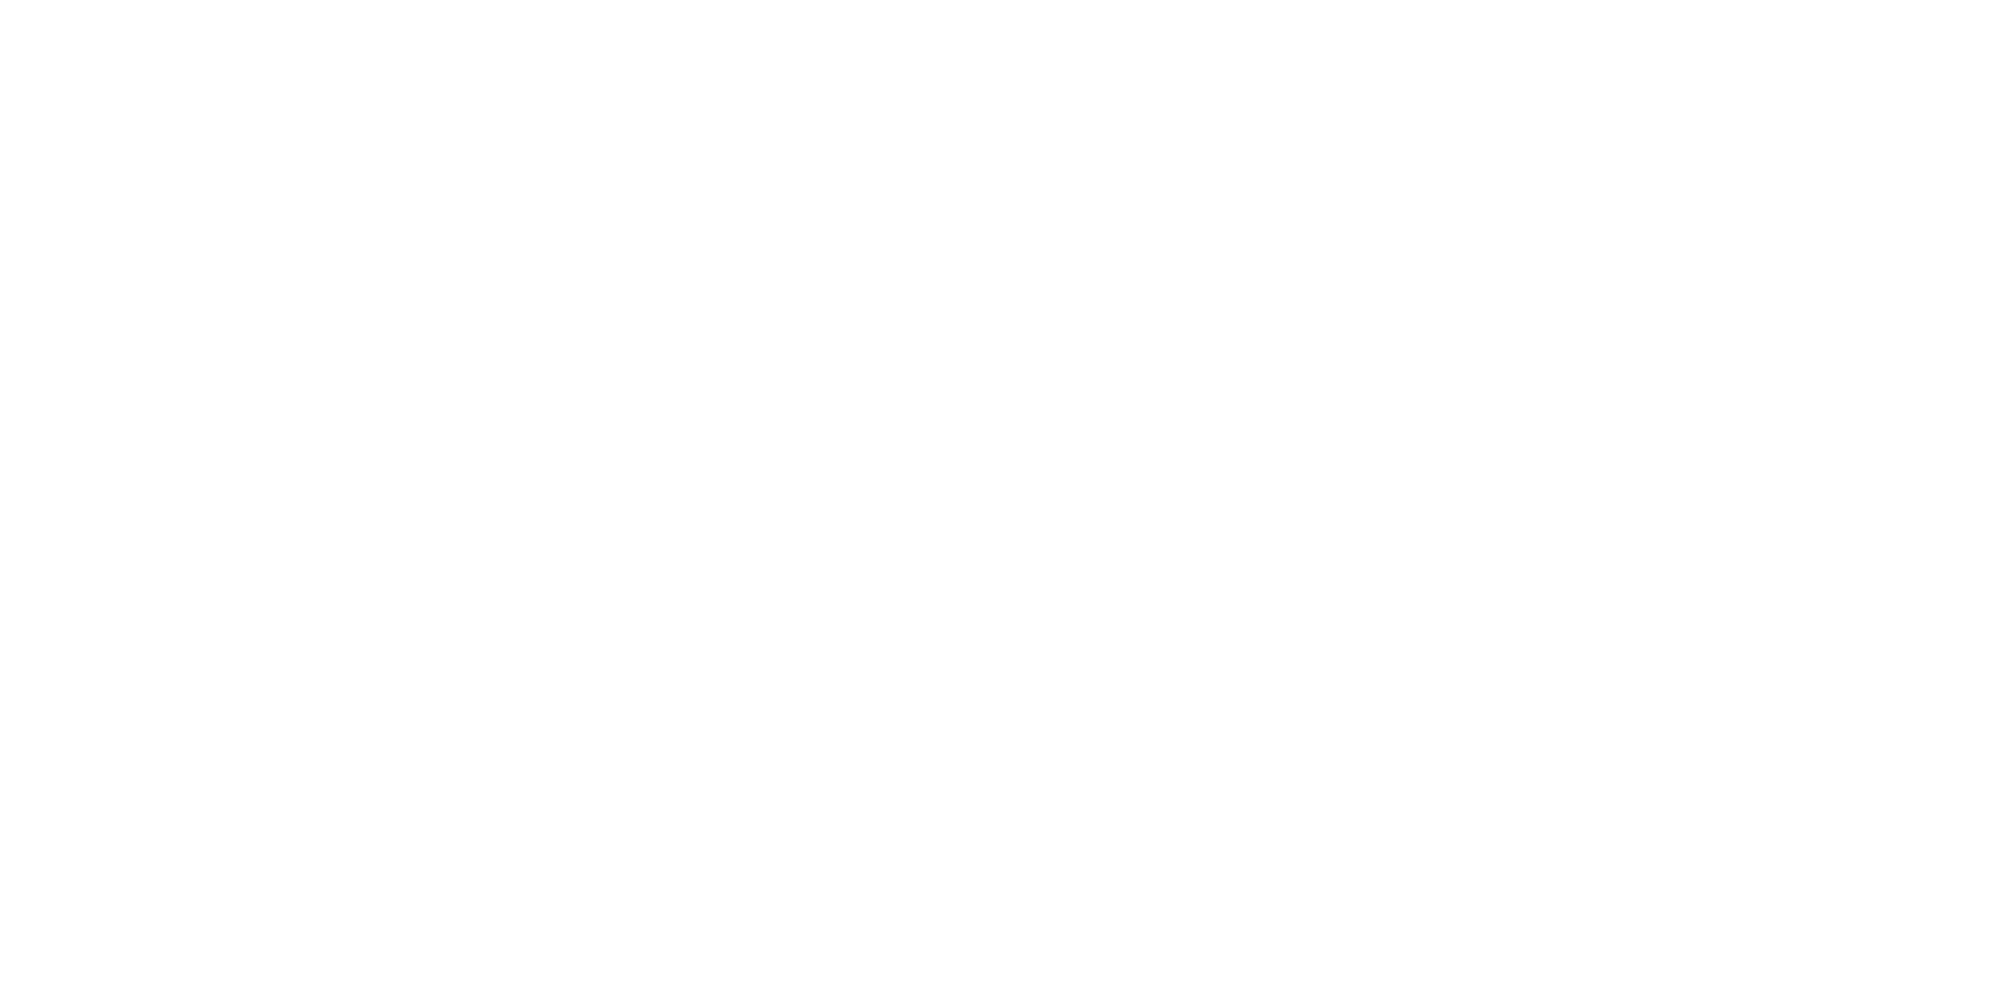

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/139926933.py:27: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  pl.close()


<IPython.core.display.Javascript object>


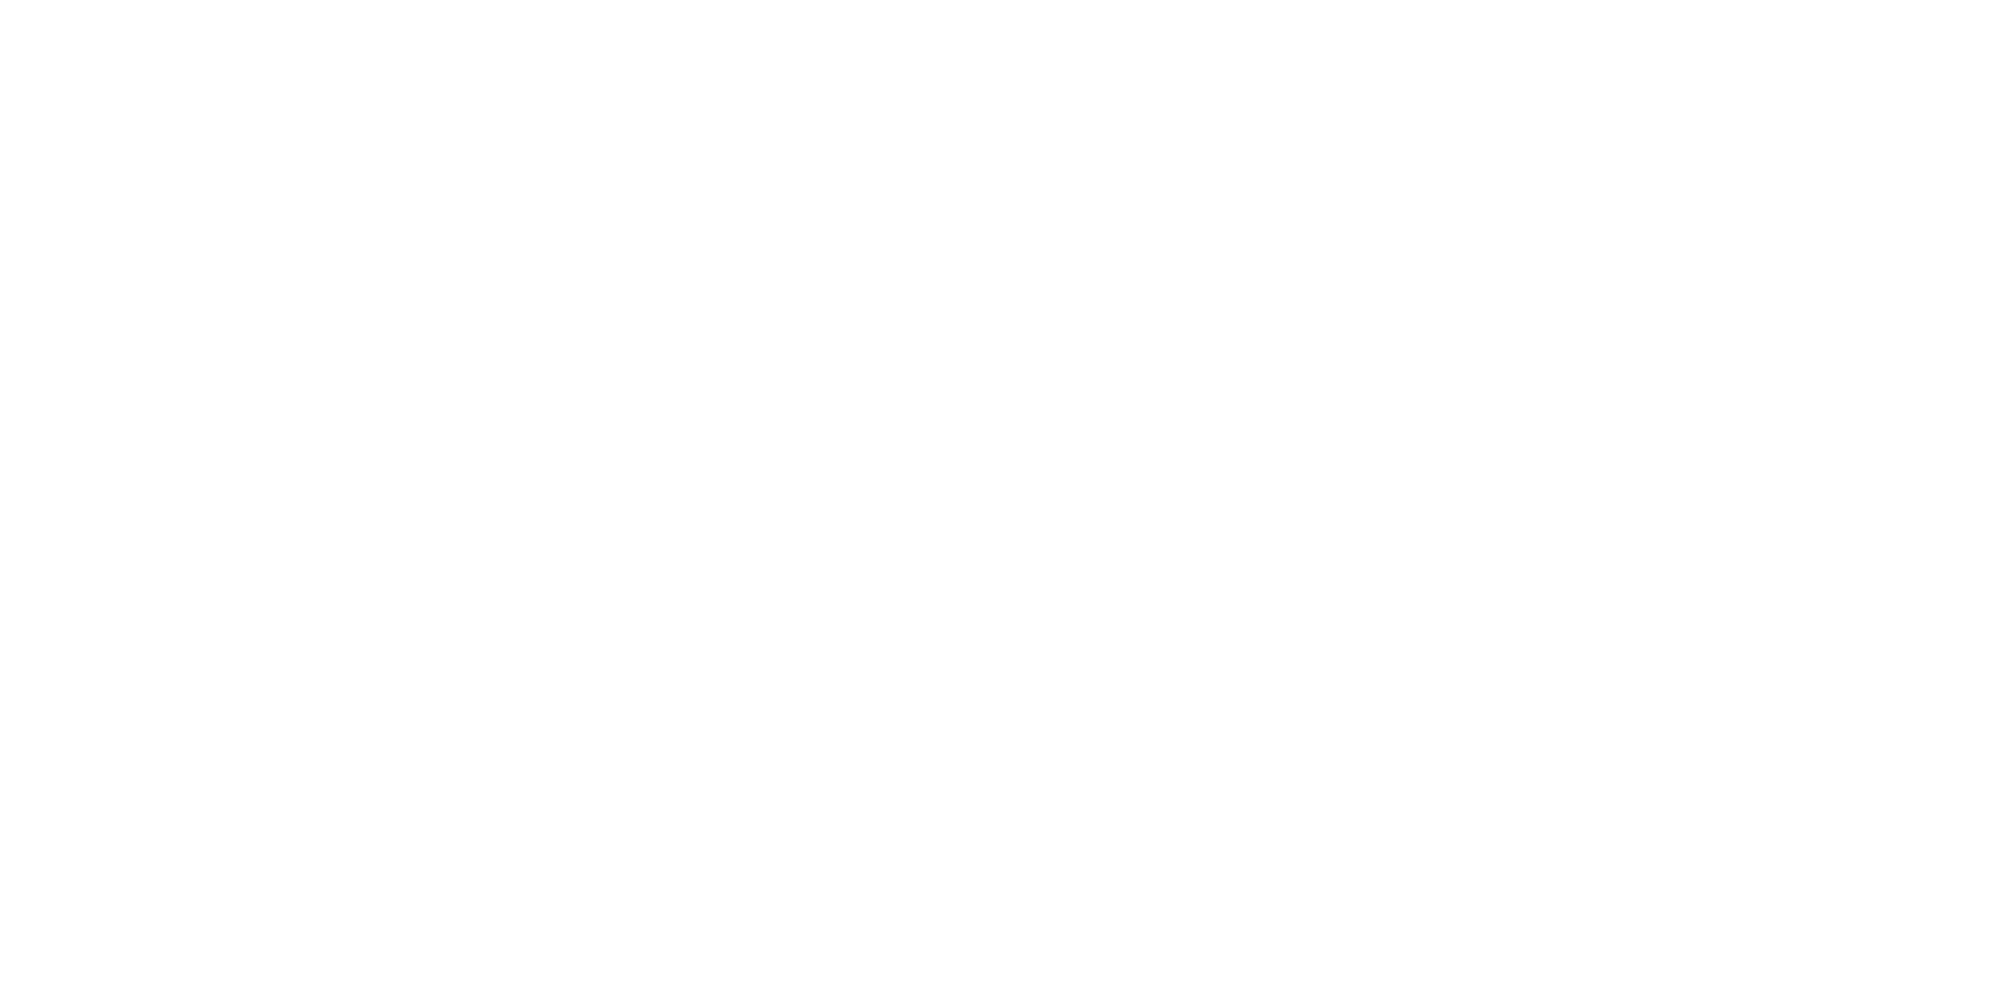

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/139926933.py:27: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  pl.close()


<IPython.core.display.Javascript object>


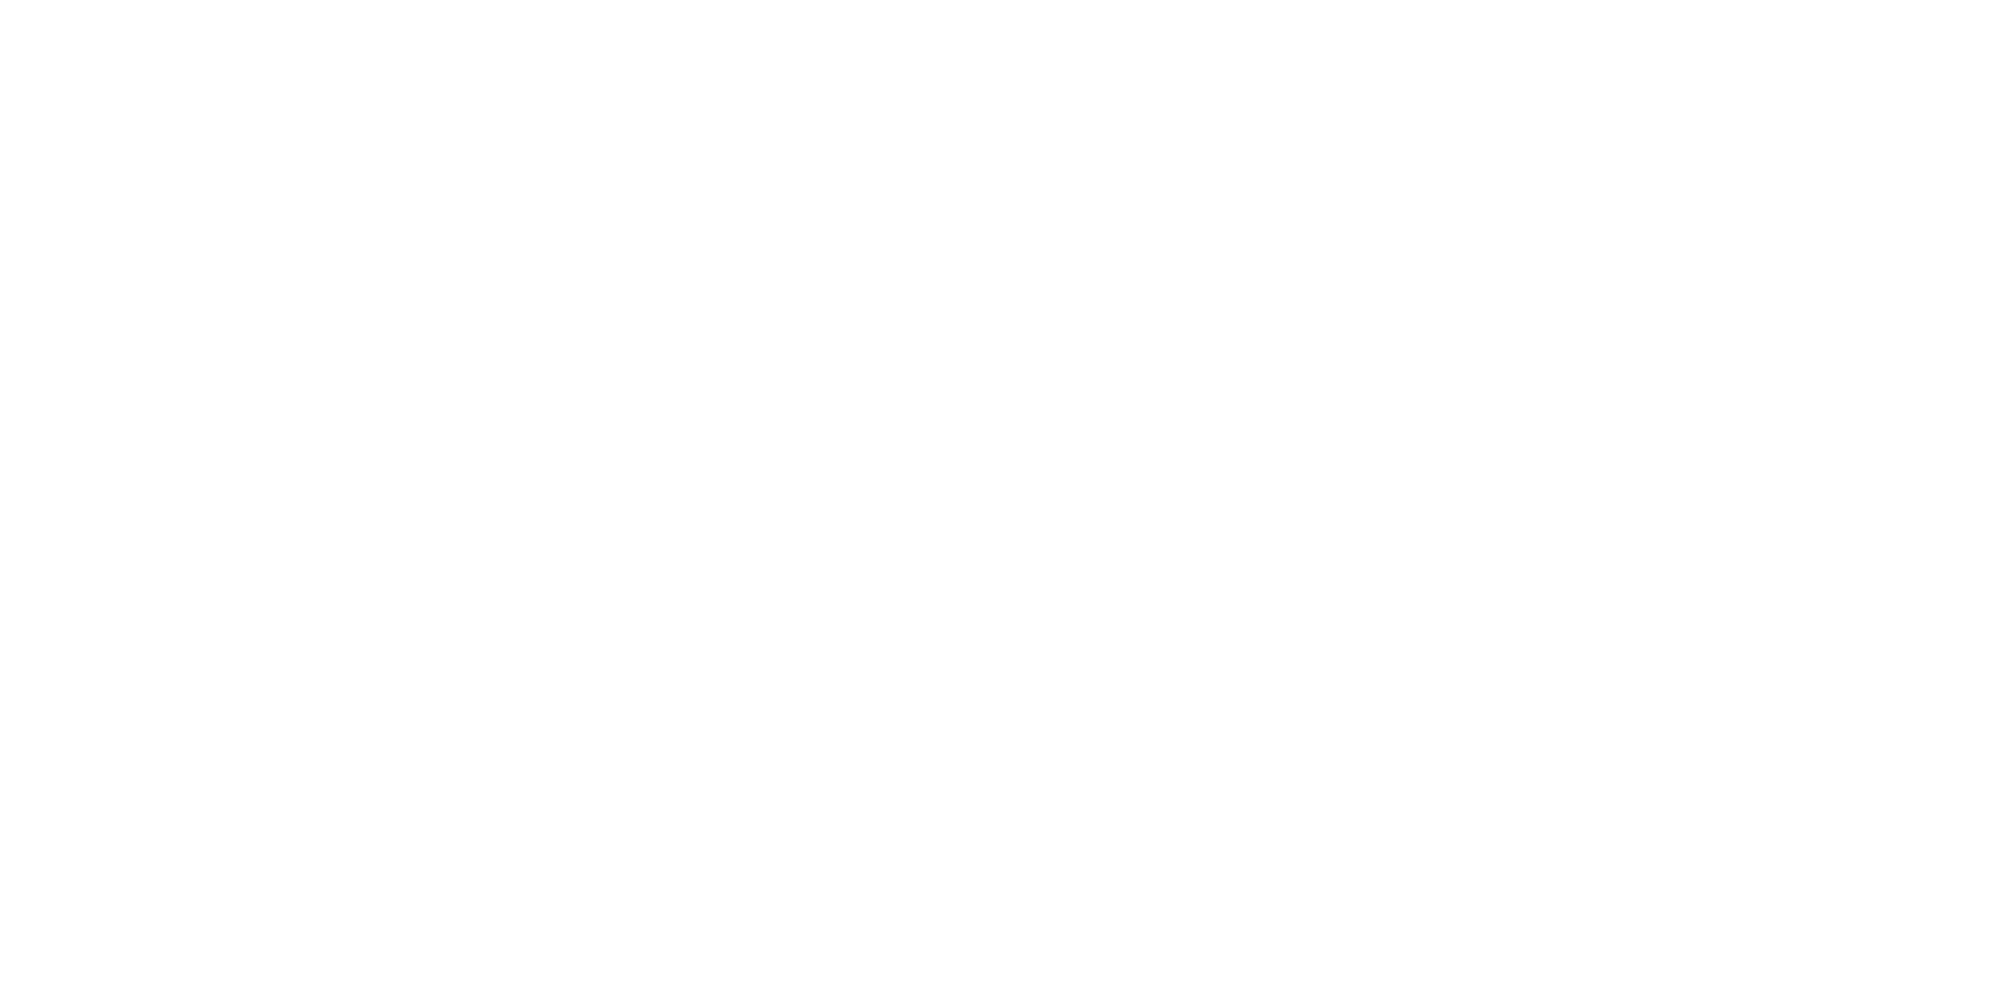

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_49587/139926933.py:27: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  pl.close()


In [752]:
t_starts = [0, 100, 150, 380, 550]
t_ends = [50, 150, 250, 450, 600]

for t_start, t_end in zip(t_starts, t_ends):

    plotdf = fulldf[(fulldf['rel_time']<=t_end) & (fulldf['rel_time']>=t_start)].copy()
    # plotdf = fulldf.copy()
    fig, axn = pl.subplots(2, 1, figsize=(10,5), sharex=True, sharey=True) #, constrained_layout=True)
    for ai, hemi in enumerate(['left', 'right']):
        ax=axn[ai]
        ax.set_title(hemi, loc='left')
        ax.plot(plotdf['rel_time'], plotdf['neural_{}'.format(hemi)], color='w', lw=0.5)
        #putil.add_colored_lines(plotdf, ax=ax, xvar='rel_time', yvar='neural_{}'.format(hemi), hue_var='rel_time', cmap=cmap, norm=norm)
        sns.scatterplot(data=plotdf[(plotdf['tap']>=2)], 
                        x='rel_time', y='neural_{}'.format(hemi), 
                        hue='tap', palette=tap_palette, ax=ax, zorder=40, 
                        edgecolor=[0.7]*3, linewidth=0.1, s=20, alpha=1)
        #ax.set_aspect(100)
        ax.set_ylabel('dF/F')
    pl.subplots_adjust(left=0.1, right=0.95, top=0.8)
    ax.set_xlabel('time (s)')
    sns.despine(trim=True)
    
    util.label_figure(fig, logfn)
    figname = 'neuraltraces_with_taps-ZOOM_{}-{}sec_{}'.format(t_start, t_end, logfn)
    pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
    pl.close()

In [ ]:
tap_palette

In [613]:
fulldf['tap'].unique()

array([nan,  2.,  4.,  1.,  3.])

In [615]:
tap_palette

{nan: 'k', 1.0: 'gray', 2.0: 'indigo', 3.0: 'darkmagenta', 4.0: 'magenta'}

<IPython.core.display.Javascript object>


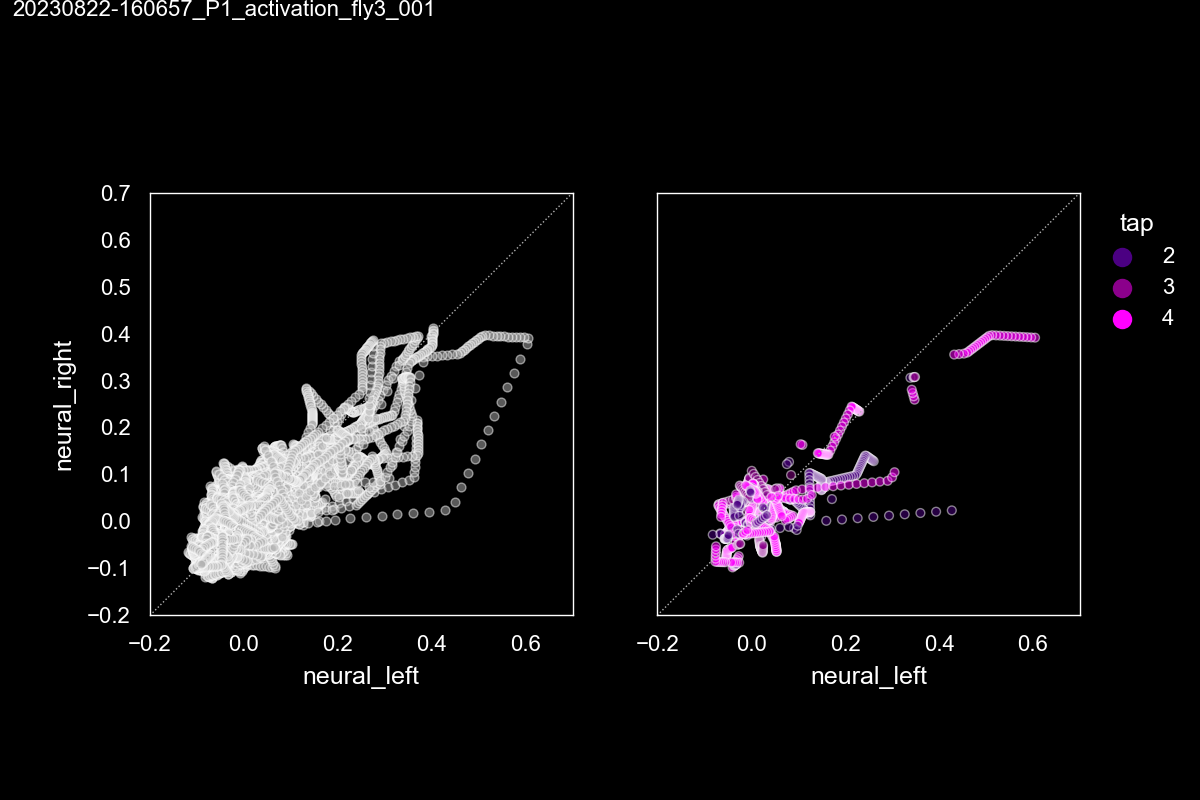

In [745]:
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)
ax=axn[0]
sns.scatterplot(data=fulldf, x='neural_left', y='neural_right', ax=ax,
                color=[0.7]*3, edgecolor='w', linewidth=0.5, alpha=0.5, s=10)
ax=axn[1]
sns.scatterplot(data=fulldf[fulldf['tap']>=2], x='neural_left', y='neural_right', 
                hue='tap', palette=tap_palette, ax=ax, plotnonfinite=True,
                edgecolor='w', linewidth=0.5, alpha=0.5, s=10)
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
for ax in axn:
    ax.set_aspect('equal')
    ax.set_box_aspect(1)
    ax.set_xlim([-0.2, 0.7])
    ax.set_ylim([-0.2, 0.7])
    ax.plot([-0.2, 0.7], [-0.2, 0.7], lw=0.5, linestyle=':', c=[0.7]*3)
    
util.label_figure(fig, logfn)
figname = 'neural-scatter_left-v-right_{}'.format(logfn)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


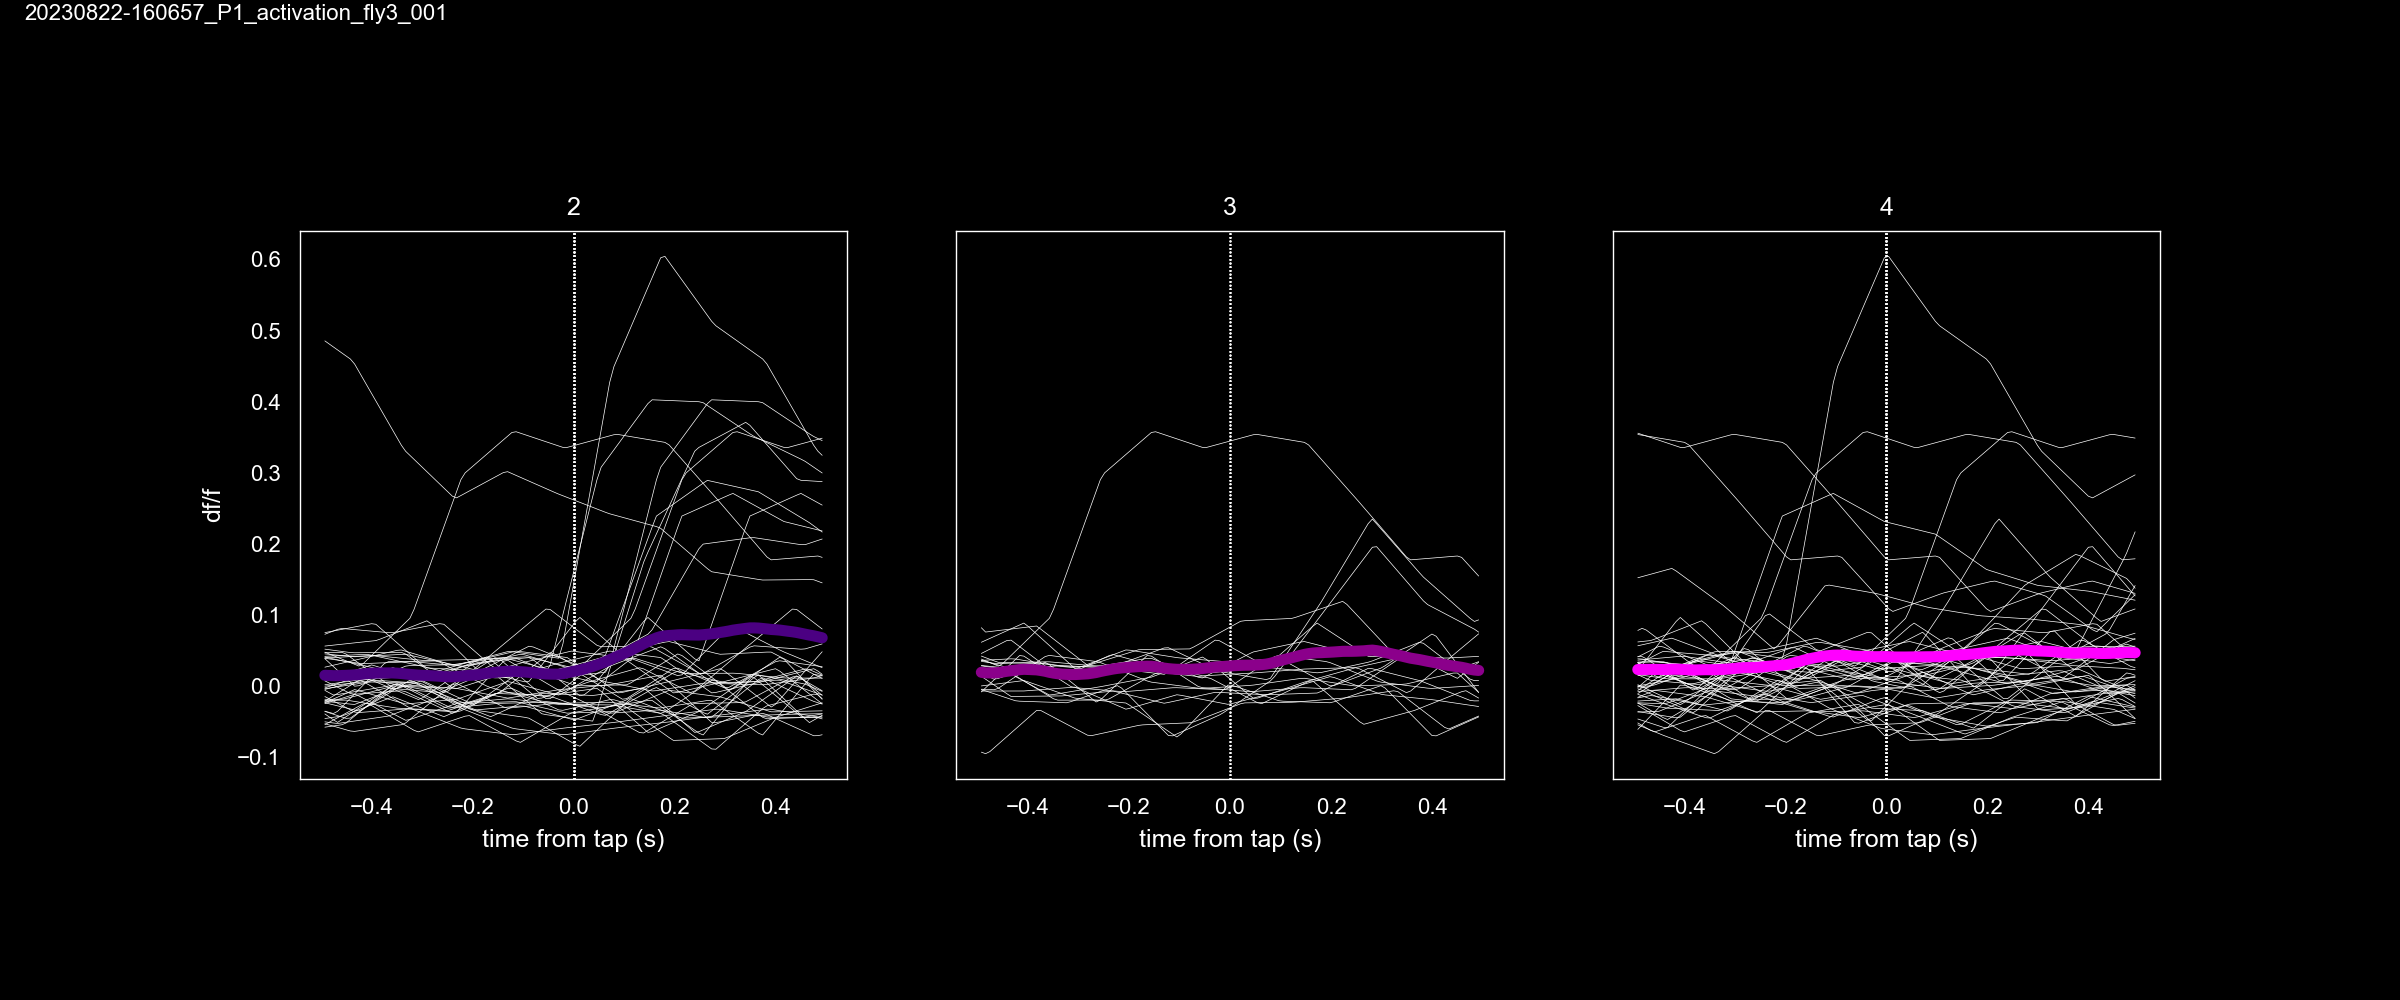

neural-psth_pre-post-0.5_20230822-160657_P1_activation_fly3_001


In [727]:
final_fps = 1/fulldf['rel_time'].diff().mean()
window_sec = 0.5
window_sz = int(window_sec * final_fps)
## 
arr={}
fig, axn = pl.subplots(1, 3, sharey=True, figsize=(12, 5))
for ai, (tl, currdf) in enumerate(fulldf[fulldf['tap']>=2].groupby('tap')):
#currdf = fulldf[fulldf['tap']==4].copy()
    ax=axn[ai]
    ax.set_title(tl)
    arr[tl] = []
    for tn, t_ in currdf.groupby('tapnum'):
        mid = t_['frameid'].values[0]
        st = mid - window_sz #len(t_)
        ed = mid + window_sz #t_['frameid'].values[-1]+1
        yvs = fulldf[fulldf['frameid'].isin(np.arange(st, ed))]['neural_left']
        xs = np.linspace(-window_sz/final_fps, window_sz/final_fps, num=len(yvs))
        ax.plot(xs, yvs, lw=0.25, color='w')
        ax.axvline(x=0, lw=0.5, color='w', linestyle=':', alpha=0.5)
        arr[tl].append(yvs)
    
    mean_ys = np.mean(np.array(arr[tl]), axis=0)
    ax.plot(xs, mean_ys, lw=4, color=tap_palette[tl])

for ai, ax in enumerate(axn):
    ax.set_box_aspect(1)
    ax.set_xlabel('time from tap (s)')
    if ai==0:
        ax.set_ylabel('df/f')
        

util.label_figure(fig, logfn)
figname = 'neural-psth_pre-post-{}_{}'.format(str(window_sec), logfn)
print(figname)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))